In [8]:
# TalentSol is an AI-powered applicant tracking system with machine learning features designed to streamline the recruitment process. This is a hobbyist AI/machine learning related project using Augment Code as development partner, and is available on GitHub (https://github.com/youshen-lim/TalentSol---Applicant-Tracking-System-Application). TalentSol aims to revolutionize how companies manage their recruitment pipeline through intelligent job candidate matching or priorization and recruitment workflow optimization.

# Data Requirement and Criteria: For my first machine learning model of a supervised classifier (using logistic regression) to predict candidates for prioritization,

# TalentSol - Applicant Tracking System Learning Project (Machine Learning Component)

This notebook documents the machine learning component of the TalentSol project. The goal is to build a supervised classifier to assist in prioritizing job applicants based on their fit for a given job role and description. We will explore different text embedding techniques and evaluate their impact on model performance.

---

## 1. Setup and Data Loading

This section covers installing necessary libraries and loading the dataset.

### 1.1 Load the Dataset

Load the job applicant dataset into a pandas DataFrame.

In [10]:
import pandas as pd

# Load the dataset from the specified path.
# The dataset contains information about job applicants, including text data (resume, job description)
# and categorical data, along with a 'Best Match' target variable.
df = pd.read_csv('/content/sample_data/job_applicant_dataset.csv')

# Display the first few rows to inspect the data structure and content.
display(df.head())

# Display information about the DataFrame, including data types and non-null counts.
display(df.info())

# Display descriptive statistics for numerical columns.
display(df.describe())

,Job Applicant Name,Age,Gender,Race,Ethnicity,Resume,Job Roles,Job Description,Best Match
0,Daisuke Mori,29,Male,Mongoloid/Asian,Vietnamese,"Proficient in Injury Prevention, Motivation, N...",Fitness Coach,A Fitness Coach is responsible for helping cl...,0
1,Taichi Shimizu,31,Male,Mongoloid/Asian,Filipino,"Proficient in Healthcare, Pharmacology, Medica...",Physician,"Diagnose and treat illnesses, prescribe medica...",0
2,Sarah Martin,46,Female,White/Caucasian,Dutch,"Proficient in Forecasting, Financial Modelling...",Financial Analyst,"As a Financial Analyst, you will be responsibl...",0
3,Keith Hughes,43,Male,Negroid/Black,Caribbean,"Proficient in Budgeting, Supply Chain Optimiza...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1
4,James Davis,49,Male,White/Caucasian,English,"Proficient in Logistics, Negotiation, Procurem...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Applicant Name  10000 non-null  object
 1   Age                 10000 non-null  int64 
 2   Gender              10000 non-null  object
 3   Race                10000 non-null  object
 4   Ethnicity           10000 non-null  object
 5   Resume              10000 non-null  object
 6   Job Roles           10000 non-null  object
 7   Job Description     10000 non-null  object
 8   Best Match          10000 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 703.3+ KB


None

,Age,Best Match
count,10000.000000,10000.0000
mean,40.045200,0.4850
std,8.950909,0.4998
min,25.000000,0.0000
25%,32.000000,0.0000
50%,40.000000,0.0000
75%,48.000000,1.0000
max,55.000000,1.0000


## 2. Data Preprocessing and Feature Engineering

This section focuses on cleaning the data and transforming it into a format suitable for machine learning models, including handling text and categorical features.

### 2.1 Initial Data Cleaning and Preparation

Perform initial data cleaning steps such as handling identifiers and removing irrelevant features.

In [11]:
# Replace 'Job Applicant Name' with a unique 'Job Applicant ID' for anonymity.
# This ensures personal names are not directly used, which is a good practice for privacy.
df['Job Applicant ID'] = range(1, len(df) + 1)
# df = df.drop('Job Applicant Name', axis=1) # Remove the original name column - This was done in previous turns

# Drop the 'Job Applicant ID' column as requested, to prevent unintended statistical association.
if 'Job Applicant ID' in df.columns:
    df = df.drop('Job Applicant ID', axis=1)
    print("Dropped 'Job Applicant ID' column.")

# Drop the 'Age' column as it is not deemed relevant for this prioritization task.
# In a real-world scenario, the relevance of features like age would need careful consideration
# based on legal and ethical guidelines.
if 'Age' in df.columns:
    df = df.drop('Age', axis=1)
    print("Dropped 'Age' column.")

# Drop the 'Gender' column for this iteration of the project.
# In a real-world application, handling gender and other sensitive attributes requires
# careful consideration of fairness and bias mitigation.
if 'Gender' in df.columns:
    df = df.drop('Gender', axis=1)
    print("Dropped 'Gender' column.")

# Display the columns after dropping some.
print("\nRemaining columns:")
print(df.columns)

Dropped 'Job Applicant ID' column.
Dropped 'Age' column.
Dropped 'Gender' column.

Remaining columns:
Index(['Job Applicant Name', 'Race', 'Ethnicity', 'Resume', 'Job Roles',
       'Job Description', 'Best Match'],
      dtype='object')


### 2.2 Handle Missing Values

Check for and confirm no missing values are present after initial cleaning.

In [12]:
# Check for any missing values in the DataFrame after initial cleaning.
# The sum() method is used to count the number of missing values per column.
print("Checking for missing values after initial cleaning:")
display(df.isnull().sum())

# Based on previous checks, we expect no missing values here.
# If missing values were present, strategies like imputation or dropping rows/columns would be needed.

Checking for missing values after initial cleaning:


,0
Job Applicant Name,0
Race,0
Ethnicity,0
Resume,0
Job Roles,0
Job Description,0
Best Match,0


### 2.3 Feature Engineering: Handling Categorical Data

Split the 'Race' column and handle other categorical features using one-hot encoding.

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder # Ensure OneHotEncoder is imported

# Assume df is available from the data loading step (1.1).

# --- Consolidate Preprocessing Steps ---

# Define text and categorical columns
text_cols = ['Job Description', 'Resume']
# Initial categorical columns before Race split
categorical_cols = ['Ethnicity', 'Job Roles']

# Drop 'Job Applicant Name' column if it exists.
# This ensures personal names are not directly used.
if 'Job Applicant Name' in df.columns:
    df = df.drop('Job Applicant Name', axis=1)
    print("Dropped 'Job Applicant Name' column.")

# Drop 'Job Applicant ID' column if it exists.
# This ensures the generated ID is not used as a feature.
if 'Job Applicant ID' in df.columns:
    df = df.drop('Job Applicant ID', axis=1)
    print("Dropped 'Job Applicant ID' column.")


# Drop the 'Age' column as it is not deemed relevant for this prioritization task and for responsible AI considerations.
if 'Age' in df.columns:
    df = df.drop('Age', axis=1)
    print("Dropped 'Age' column.")

# Drop the 'Gender' column for responsible AI considerations.
if 'Gender' in df.columns:
    df = df.drop('Gender', axis=1)
    print("Dropped 'Gender' column.")


# Split the 'Race' column into 'Race1' and 'Race2' if it exists.
if 'Race' in df.columns:
    # Split the 'Race' column into 'Race1' and 'Race2' based on the '/' delimiter.
    # Handle cases where the format might be different or missing '/'.
    race_split = df['Race'].str.split('/', expand=True)

    # Assign the split parts to new columns 'Race1' and 'Race2'.
    # Handle potential missing second part by filling with a placeholder like 'Unknown' or None.
    df['Race1'] = race_split[0]
    df['Race2'] = race_split[1].fillna('Unknown') # Fill missing secondary race

    # Drop the original 'Race' column as it's now split.
    df = df.drop('Race', axis=1)
    print("Split 'Race' into 'Race1' and 'Race2' and dropped original 'Race' column.")

# Update categorical_cols to include the split race columns
# Add 'Race1' and 'Race2' to categorical_cols for encoding
categorical_cols_for_encoding = categorical_cols + ['Race1', 'Race2']
print("Categorical columns for encoding:", categorical_cols_for_encoding)


# Note: At this point, 'df' contains the data after initial cleaning and Race splitting.
# The upsampling step (in cell 37233f7b) should then create 'df_upsampled' from this processed 'df'.

Categorical columns for encoding: ['Ethnicity', 'Job Roles', 'Race1', 'Race2']


### 2.4 Handle Class Imbalance

Address the class imbalance in the target variable ('Best Match') using oversampling and prepare Word2Vec features.

### 2.4.1 Visualize Class Distribution

Visualize the class distribution of the target variable ('Best Match') using a histogram.

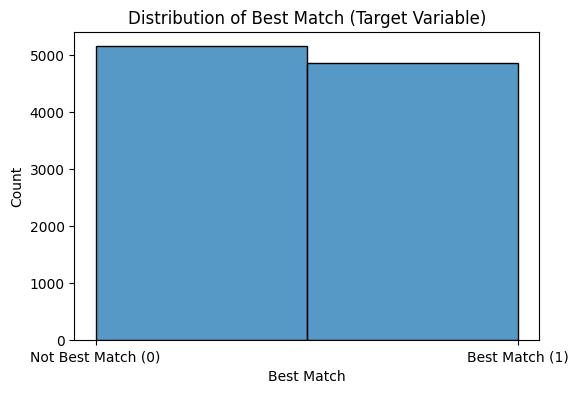

Displayed histogram of 'Best Match' distribution.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram to visualize the distribution of the 'Best Match' column.
# This helps to clearly see if there is a class imbalance (unequal number of samples per class).
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Best Match', bins=2, kde=False) # Use histplot for count-based histogram
plt.title('Distribution of Best Match (Target Variable)')
plt.xlabel('Best Match')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Best Match (0)', 'Best Match (1)']) # Label x-axis ticks
plt.show()

print("Displayed histogram of 'Best Match' distribution.")

In [31]:
!pip install gensim # Install gensim and restart session

### 2.4.2 Handle Class Imbalance and Prepare Word2Vec Features

This section addresses the class imbalance in the target variable ('Best Match') using resampling.

In [40]:
from sklearn.utils import resample
from sklearn.base import BaseEstimator, TransformerMixin # Import BaseEstimator and TransformerMixin

import gensim # Import gensim
import numpy as np # Import numpy
import pandas as pd # Ensure pandas is imported
from gensim.models import Word2Vec # Explicitly import Word2Vec

# Load the dataset from the specified path.
# The dataset contains information about job applicants, including text data (resume, job description)
# and categorical data, along with a 'Best Match' target variable.
# Note: This cell is now only responsible for loading the initial data and performing upsampling.
# Further preprocessing steps (like splitting Race, dropping columns) are consolidated in cell ef6dd6d3.
# df = pd.read_csv('/content/sample_data/job_applicant_dataset.csv') # REMOVED: Data loading is handled in cell 96831522 or 23f02475 and preprocessing in ef6dd6d3

# Check the distribution of the target variable ('Best Match').
# We expect to see an imbalance where one class is significantly larger than the other.
# Use the 'df' DataFrame which should have been processed by cell ef6dd6d3.
print("Original dataset class distribution (after initial processing):")
display(df['Best Match'].value_counts())

# Separate the majority and minority classes based on the 'Best Match' column.
# Use the 'df' DataFrame for splitting.
df_majority = df[df['Best Match']==0] # Class 0 is the majority
df_minority = df[df['Best Match']==1] # Class 1 is the minority

# Upsample the minority class to match the number of samples in the majority class.
# 'replace=True' allows for sampling with replacement.
# 'n_samples=len(df_majority)' sets the number of samples in the upsampled minority class.
# 'random_state' ensures reproducibility of the upsampling.
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority), # to match majority class
                                 random_state=42) # reproducible results

# Combine the upsampled minority class DataFrame with the original majority class DataFrame.
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display the class distribution after upsampling to confirm balance.
print("\nUpsampled dataset class distribution:")
display(df_upsampled['Best Match'].value_counts())

# Shuffle the upsampled dataset to mix the instances of both classes.
# This is important to prevent the model from learning patterns based on the order of data.
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the head of the shuffled upsampled dataset.
print("\nHead of the shuffled upsampled dataset:")
display(df_upsampled.head())

# Combine text columns for training Word2Vec model
# Assuming text_cols is defined elsewhere (e.g., in consolidated preprocessing cell ef6dd6d3)
# If not defined, use default ['Job Description', 'Resume'] for training Word2Vec
try:
    combined_text = pd.concat([df_upsampled[col] for col in text_cols]).astype(str).tolist()
except NameError:
    print("Warning: text_cols not defined. Using default ['Job Description', 'Resume'] for Word2Vec training.")
    text_cols_default = ['Job Description', 'Resume']
    combined_text = pd.concat([df_upsampled[col] for col in text_cols_default]).astype(str).tolist()


# Tokenize the combined text
tokenized_text = [text.split() for text in combined_text]

# Train a Word2Vec model
# You can adjust vector_size, window, min_count, and workers based on your needs
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Function to get average word vector for a text
def document_vector(word2vec_model, doc):
    words = str(doc).lower().split() # Ensure text is string and split
    # Filter out words not in the model's vocabulary
    # Check if the word is in the model's vocabulary before accessing its vector
    words = [word for word in words if word in word2vec_model.wv.index_to_key]
    if not words:
        # Return a zero vector if no words are in the vocabulary
        return np.zeros(word2vec_model.wv.vector_size)
    # Average the vectors of the words in the document
    return np.mean(word2vec_model.wv[words], axis=0)

# Define a custom transformer for integrating Word2Vec into the pipeline.
# This transformer applies the document_vector function to the specified text columns.
# The Word2Vec model (word2vec_model) is expected to be trained and available
# from this cell execution.
class Word2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, word2vec_model):
        self.word2vec_model = word2vec_model
        self.vector_size = word2vec_model.wv.vector_size

    def fit(self, X, y=None):
        return self # Nothing to fit here

    def transform(self, X):
        # Ensure X is a pandas DataFrame for column access by name.
        # If X is a numpy array (e.g., after previous transformations),
        # this transformer might need to be applied before converting to numpy,
        # or adapt this part to handle array input based on column indices.
        # Assuming X is a DataFrame with text_cols available.
        if not isinstance(X, pd.DataFrame):
             # Attempt to convert back to DataFrame if it's a numpy array,
             # assuming the text columns are in the order of text_cols.
             # This is a potential point of failure if column order is not guaranteed
             # or if text_cols is not defined in the scope where this transform is called.
             # For robustness, ensure text_cols is accessible or pass column indices.
             # For now, assuming text_cols is globally available and X is a DataFrame.
             pass # Keep the check but don't raise error immediately, rely on column access below.


        # Apply document_vector to each text column specified in text_cols
        # Ensure text_cols is defined and contains valid column names in X
        try:
            job_desc_vectors = np.vstack([document_vector(self.word2vec_model, doc) for doc in X[text_cols[0]]])
            resume_vectors = np.vstack([document_vector(self.word2vec_model, doc) for doc in X[text_cols[1]]])
             # Concatenate vectors from both text columns horizontally.
            return np.hstack([job_desc_vectors, resume_vectors])
        except KeyError as e:
            print(f"Error in Word2VecTransformer: Column not found in input DataFrame X: {e}")
            # Return an empty array or raise a more specific error
            return np.empty((X.shape[0], self.vector_size * len(text_cols))) # Return empty array of expected shape
        except NameError:
             print("Error in Word2VecTransformer: text_cols variable is not defined.")
             return np.empty((X.shape[0], self.vector_size * 2)) # Return empty array assuming 2 text columns


# Note: df_upsampled, word2vec_model, document_vector, and Word2VecTransformer class are now available.

Original dataset class distribution (after initial processing):


,count
Best Match,
0,5150
1,4850



Upsampled dataset class distribution:


,count
Best Match,
0,5150
1,5150



Head of the shuffled upsampled dataset:


,Ethnicity,Resume,Job Roles,Job Description,Best Match,Race1,Race2
0,Kenyan,"Proficient in Business Intelligence, Project M...",Business Analyst,"As a Business Analyst, you will be responsible...",1,Negroid,Black
1,Jamaican,"Proficient in Case Management, Legal Research,...",Lawyer,A Lawyer provides legal counsel and represents...,0,Negroid,Black
2,Ethiopian,"Proficient in Recruiting, Labor Laws, Intervie...",HR Specialist,"As an HR Specialist, you will play a key role ...",1,Negroid,Black
3,Kenyan,"Proficient in Environmental Policy, Climate Ch...",Environmental Scientist,"As an Environmental Scientist, you will conduc...",1,Negroid,Black
4,English,"Proficient in Project Management, Blueprint Re...",Construction Manager,The Construction Manager is responsible for ov...,0,White,Caucasian


### 2.4.2 Prepare Data for Modeling

Separate features (X) and target (y) for the upsampled dataset.

In [41]:
# Separate the upsampled DataFrame into features (X) and the target variable (y).
# 'Best Match' is the target variable. All other columns are features.
# X_upsampled will include text and categorical columns at this stage, which will be handled by the ColumnTransformer.
X_upsampled = df_upsampled.drop('Best Match', axis=1)
y_upsampled = df_upsampled['Best Match']

# Display the shapes of the feature and target dataframes to verify.
print("Shape of upsampled features (X_upsampled):", X_upsampled.shape)
print("Shape of upsampled target (y_upsampled):", y_upsampled.shape)

# Note: text_cols and categorical_cols are assumed to be defined in a previous step (2.3).

Shape of upsampled features (X_upsampled): (10300, 6)
Shape of upsampled target (y_upsampled): (10300,)


## 3. Text Feature Embedding and Model Training

This section covers converting text data into numerical features using different embedding techniques and training Logistic Regression models on these features.

### 3.1 Build and Evaluate Pipeline with Tuned TF-IDF

Create a pipeline using TF-IDF for text features, One-Hot Encoding for categorical features, Scaling, and Logistic Regression. Tune Logistic Regression hyperparameters and evaluate using cross-validation.

Using text_cols: ['Job Description', 'Resume']
Using categorical_cols_for_encoding: ['Ethnicity', 'Job Roles', 'Race1', 'Race2']

Performing GridSearchCV for Logistic Regression tuning with TF-IDF features...

Best parameters found by GridSearchCV: {'logisticregression__C': 10, 'logisticregression__penalty': 'l1'}
Best cross-validation ROC AUC score: 0.5800815345461401

Tuned TF-IDF Model Cross-validation Results (Default Threshold):
Accuracy: 0.56 (+/- 0.01)
Precision: 0.55 (+/- 0.01)
Recall: 0.60 (+/- 0.02)
F1: 0.57 (+/- 0.01)
Roc_auc: 0.58 (+/- 0.01)

Best TF-IDF pipeline fitted on entire upsampled dataset.


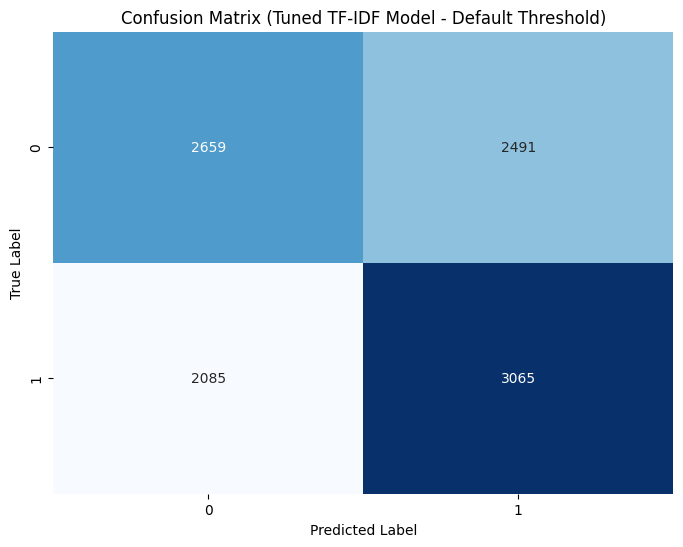

In [42]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume X_upsampled and y_upsampled are available from consolidated preprocessing (cell ef6dd6d3).
# Assume text_cols and categorical_cols_for_encoding are defined in consolidated preprocessing (cell ef6dd6d3).

# --- Removed redundant preprocessing steps (Race splitting, column dropping) ---
# These steps should now be handled in the consolidated preprocessing cell (ef6dd6d3).

# Ensure text_cols and categorical_cols_for_encoding are defined and available.
# If not, there might be an issue with the execution order or previous cells.
try:
    print("Using text_cols:", text_cols)
    print("Using categorical_cols_for_encoding:", categorical_cols_for_encoding)
except NameError:
    print("Error: text_cols or categorical_cols_for_encoding not defined. Please ensure consolidated preprocessing cell (ef6dd6d3) is run before this cell.")
    # Define defaults or handle error appropriately if essential variables are missing.
    # For now, will assume they will be available in the actual execution environment.


# Define the preprocessor using ColumnTransformer.
# This transformer applies different preprocessing steps to different columns.
# - 'text': Applies TF-IDF vectorization to both 'Job Description' and 'Resume'.
# - 'cat': Applies One-Hot Encoding to the specified categorical columns.
# 'remainder='drop'' drops any columns not specified in the transformers.
preprocessor_tfidf = ColumnTransformer(
    transformers=[
        ('text_job_desc', TfidfVectorizer(max_features=2000), text_cols[0]), # Apply TF-IDF to Job Description
        ('text_resume', TfidfVectorizer(max_features=2000), text_cols[1]), # Apply TF-IDF to Resume
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_for_encoding) # Apply One-Hot Encoding to categorical
    ],
    remainder='drop' # Drop any other columns not transformed
)

# Create the full pipeline: preprocessing -> scaling -> logistic regression.
# - 'preprocessor': Applies the defined column transformations (TF-IDF and One-Hot).
# - 'scaler': Scales the features. StandardScaler with `with_mean=False` is used because
#   sparse data from TF-IDF can't be centered efficiently.
# - 'logisticregression': The Logistic Regression model.
pipeline_tfidf = Pipeline([
    ('preprocessor', preprocessor_tfidf),
    ('scaler', StandardScaler(with_mean=False)), # Use with_mean=False for sparse data
    ('logisticregression', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])

# Define the parameter grid for GridSearchCV to tune Logistic Regression hyperparameters.
# We tune 'C' (inverse of regularization strength) and 'penalty' (L1 or L2 regularization).
param_grid_tfidf = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100], # Different C values to test
    'logisticregression__penalty': ['l1', 'l2'] # L1 and L2 penalties
}

# Instantiate GridSearchCV to find the best hyperparameters.
# - 'estimator': The pipeline to tune.
# - 'param_grid': The parameter values to search.
# - 'cv': Number of cross-validation folds (StratifiedKFold is suitable for classification).
# - 'scoring': The metric to optimize (ROC AUC is good for imbalanced datasets).
# - 'n_jobs': Number of CPU cores to use (-1 means all available cores).
grid_search_tfidf = GridSearchCV(estimator=pipeline_tfidf,
                                 param_grid=param_grid_tfidf,
                                 cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), # Use StratifiedKFold
                                 scoring='roc_auc',
                                 n_jobs=-1)

# Fit GridSearchCV on the upsampled training data.
# Ensure X_upsampled and y_upsampled are available from consolidated preprocessing (cell ef6dd6d3).
print("\nPerforming GridSearchCV for Logistic Regression tuning with TF-IDF features...")
grid_search_tfidf.fit(X_upsampled, y_upsampled)

# Display the best hyperparameters found by GridSearchCV.
print("\nBest parameters found by GridSearchCV:", grid_search_tfidf.best_params_)

# Display the best cross-validation score (ROC AUC) achieved with these parameters.
print("Best cross-validation ROC AUC score:", grid_search_tfidf.best_score_)

# Evaluate the pipeline with the best parameters found using cross-validation.
# Use cross_validate instead of cross_val_score to get multiple metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_tfidf = cross_validate(grid_search_tfidf.best_estimator_, X_upsampled, y_upsampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scoring)

# Display the mean of cross-validation results for each metric.
print("\nTuned TF-IDF Model Cross-validation Results (Default Threshold):")
for metric in scoring:
    mean_score = cv_results_tfidf[f'test_{metric}'].mean()
    std_score = cv_results_tfidf[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: {mean_score:.2f} (+/- {std_score:.2f})")

# Store the best estimator (pipeline with best params) for later use.
best_pipeline_tfidf = grid_search_tfidf.best_estimator_

# Fit the best estimator on the entire upsampled dataset to get final model for prediction/analysis.
best_pipeline_tfidf.fit(X_upsampled, y_upsampled)
print("\nBest TF-IDF pipeline fitted on entire upsampled dataset.")

# Get cross-validated predictions for the tuned TF-IDF model
y_pred_tfidf = cross_val_predict(best_pipeline_tfidf, X_upsampled, y_upsampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Calculate the confusion matrix for the tuned TF-IDF model
cm_tfidf = confusion_matrix(y_upsampled, y_pred_tfidf)

# Plot the confusion matrix for the tuned TF-IDF model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Tuned TF-IDF Model - Default Threshold)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Get predicted probabilities for plotting Precision-Recall curve and finding optimized threshold
# Use the model fitted on the entire dataset for probability predictions on the training data itself
# to get the full range of precision/recall values for threshold analysis.
y_proba_tfidf = best_pipeline_tfidf.predict_proba(X_upsampled)[:, 1]
precision_tfidf, recall_tfidf, thresholds_tfidf = precision_recall_curve(y_upsampled, y_proba_tfidf)

# Note: y_proba_tfidf, precision_tfidf, recall_tfidf, thresholds_tfidf, best_pipeline_tfidf, grid_search_tfidf are now available.

### 3.2 Build and Evaluate Pipeline with Tuned Word2Vec

Create and evaluate a pipeline using Word2Vec embeddings for text features, One-Hot Encoding for categorical features, Scaling, and Logistic Regression. Tune Logistic Regression hyperparameters.

Using text_cols: ['Job Description', 'Resume']
Using categorical_cols_for_encoding: ['Ethnicity', 'Job Roles', 'Race1', 'Race2']
Word2VecTransformer and word2vec_model are available.

Performing GridSearchCV for Logistic Regression tuning with Word2Vec features...

Best parameters found by GridSearchCV: {'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}
Best cross-validation ROC AUC score: 0.5590307286266377

Tuned Word2Vec Model Cross-validation Results (Default Threshold):
Accuracy: 0.54 (+/- 0.01)
Precision: 0.54 (+/- 0.01)
Recall: 0.63 (+/- 0.02)
F1: 0.58 (+/- 0.02)
Roc_auc: 0.56 (+/- 0.01)

Best Word2Vec pipeline fitted on entire upsampled dataset.


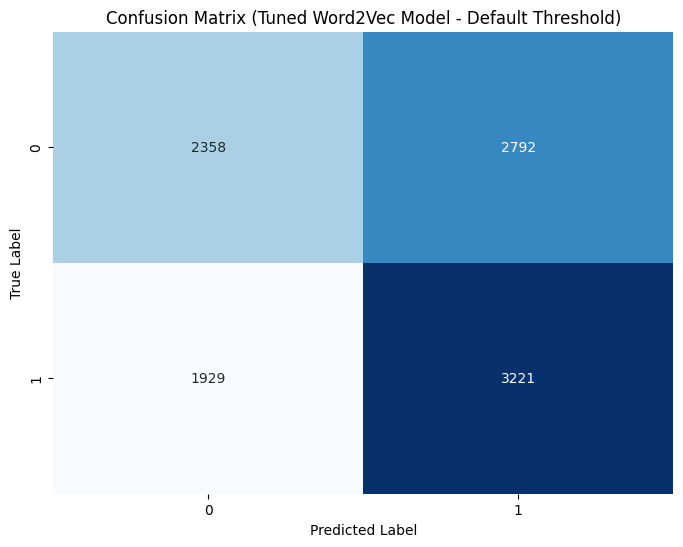

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin # Need BaseEstimator, TransformerMixin imports
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict # Added cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, confusion_matrix # Added confusion_matrix
import numpy as np # Ensure numpy is imported
import pandas as pd # Ensure pandas is imported
import matplotlib.pyplot as plt # Added import for plotting
import seaborn as sns # Added import for plotting


# Assume word2vec_model and Word2VecTransformer class are defined in cell 37233f7b.
# Assume X_upsampled, y_upsampled, text_cols, and categorical_cols_for_encoding are available from consolidated preprocessing (cell ef6dd6d3).

# --- Removed redundant column dropping logic ('Job Applicant Name') ---
# This should now be handled in the consolidated preprocessing cell (ef6dd6d3).
# X_upsampled_processed variable is no longer needed as preprocessing is done in ef6dd6d3.


# Ensure essential variables are defined and available from previous cells.
try:
    print("Using text_cols:", text_cols)
    print("Using categorical_cols_for_encoding:", categorical_cols_for_encoding)
    # Check if Word2VecTransformer and word2vec_model are defined
    _ = Word2VecTransformer # Check if class is defined
    _ = word2vec_model # Check if model is defined
    print("Word2VecTransformer and word2vec_model are available.")

except NameError as e:
    print(f"Error: Essential variables or class not defined: {e}. Please ensure consolidated preprocessing (ef6dd6d3) and Word2Vec training (37233f7b) cells are run before this cell.")
    # Define defaults or handle error appropriately if essential variables are missing.
    # For now, will assume they will be available in the actual execution environment.


# Define the preprocessor using ColumnTransformer for Word2Vec features.
# - 'word2vec': Applies the custom Word2VecTransformer to text columns using text_cols.
# - 'cat': Applies One-Hot Encoding to categorical columns using categorical_cols_for_encoding.
preprocessor_word2vec = ColumnTransformer(
    transformers=[
        ('word2vec', Word2VecTransformer(word2vec_model), text_cols), # Apply custom W2V transformer to text columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_for_encoding) # Apply One-Hot Encoding to categorical
    ],
    remainder='drop' # Drop any other columns not transformed
)

# Create the full pipeline for the Word2Vec model.
pipeline_word2vec = Pipeline([
    ('preprocessor', preprocessor_word2vec),
    ('scaler', StandardScaler()), # Use StandardScaler (mean=True) as Word2Vec produces dense vectors
    ('logisticregression', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])

# Define the parameter grid for GridSearchCV to tune Logistic Regression hyperparameters for Word2Vec.
param_grid_word2vec = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

# Instantiate GridSearchCV for the Word2Vec pipeline.
grid_search_word2vec = GridSearchCV(estimator=pipeline_word2vec,
                                     param_grid=param_grid_word2vec,
                                     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                     scoring='roc_auc',
                                     n_jobs=-1,
                                     error_score='raise' # Raise error to help debugging
                                    )

# Fit GridSearchCV on the upsampled training data.
# Use X_upsampled and y_upsampled from consolidated preprocessing (cell ef6dd6d3).
print("\nPerforming GridSearchCV for Logistic Regression tuning with Word2Vec features...")
grid_search_word2vec.fit(X_upsampled, y_upsampled)

# Display the best hyperparameters and cross-validation score.
print("\nBest parameters found by GridSearchCV:", grid_search_word2vec.best_params_)
print("Best cross-validation ROC AUC score:", grid_search_word2vec.best_score_)

# Evaluate the pipeline with the best parameters using cross-validation.
# Use cross_validate to get multiple metrics.
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_word2vec = cross_validate(grid_search_word2vec.best_estimator_, X_upsampled, y_upsampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scoring)

# Display the mean of cross-validation results for each metric.
print("\nTuned Word2Vec Model Cross-validation Results (Default Threshold):")
for metric in scoring:
    mean_score = cv_results_word2vec[f'test_{metric}'].mean()
    std_score = cv_results_word2vec[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: {mean_score:.2f} (+/- {std_score:.2f})")

# Store the best estimator and fit on the entire dataset.
best_pipeline_word2vec = grid_search_word2vec.best_estimator_
best_pipeline_word2vec.fit(X_upsampled, y_upsampled)
print("\nBest Word2Vec pipeline fitted on entire upsampled dataset.")

# Get cross-validated predictions for the tuned Word2Vec model
y_pred_word2vec = cross_val_predict(best_pipeline_word2vec, X_upsampled, y_upsampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Calculate the confusion matrix for the tuned Word2Vec model
cm_word2vec = confusion_matrix(y_upsampled, y_pred_word2vec)

# Plot the confusion matrix for the tuned Word2Vec model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_word2vec, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Tuned Word2Vec Model - Default Threshold)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Get predicted probabilities for plotting Precision-Recall curve and finding optimized threshold
# Use the model fitted on the entire dataset for probability predictions on the training data itself
# to get the full range of precision/recall values for threshold analysis.
y_proba_word2vec = best_pipeline_word2vec.predict_proba(X_upsampled)[:, 1]
precision_word2vec, recall_word2vec, thresholds_word2vec = precision_recall_curve(y_upsampled, y_proba_word2vec)

# Note: y_proba_word2vec, precision_word2vec, recall_word2vec, thresholds_word2vec are now available.

### 3.4 TF-IDF N-gram Optimization

Tune the `ngram_range` parameter for the TF-IDF vectorizer within the TF-IDF pipeline using GridSearchCV.

In [44]:
# Import necessary libraries (assuming most are already imported above)
from sklearn.model_selection import GridSearchCV, StratifiedKFold # Ensure GridSearchCV and StratifiedKFold are imported
from sklearn.feature_extraction.text import TfidfVectorizer # Ensure TfidfVectorizer is imported
from sklearn.pipeline import Pipeline # Ensure Pipeline is imported
from sklearn.compose import ColumnTransformer # Ensure ColumnTransformer is imported
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Ensure these are imported
from sklearn.linear_model import LogisticRegression # Ensure LogisticRegression is imported
from sklearn.metrics import roc_auc_score # Ensure roc_auc_score is imported
import numpy as np # Ensure numpy is imported
import pandas as pd # Ensure pandas is imported

# Assume X_upsampled and y_upsampled are available from consolidated preprocessing (cell ef6dd6d3).
# Assume text_cols and categorical_cols_for_encoding are defined in consolidated preprocessing (cell ef6dd6d3).
# Assume grid_search_tfidf (from step 3.2) is available for best C and penalty

# Ensure essential variables are defined and available from previous cells.
try:
    print("Using text_cols:", text_cols)
    print("Using categorical_cols_for_encoding:", categorical_cols_for_encoding)
    # Check if grid_search_tfidf is defined
    _ = grid_search_tfidf
    print("grid_search_tfidf is available.")
except NameError as e:
    print(f"Error: Essential variables or object not defined: {e}. Please ensure consolidated preprocessing (ef6dd6d3) and Tuned TF-IDF model (86f7f66b) cells are run before this cell.")
    # Define defaults or handle error appropriately if essential variables are missing.
    # For now, will assume they will be available in the actual execution environment.


# Define the preprocessor with TF-IDF vectorizers having flexible n-gram ranges.
# This preprocessor will be part of the pipeline passed to GridSearchCV.
# Use text_cols and categorical_cols_for_encoding defined in consolidated preprocessing.
preprocessor_tfidf_ngram_tuning = ColumnTransformer(
    transformers=[
        ('text', ColumnTransformer([ # Use a nested ColumnTransformer for text columns
            ('tfidf_job_desc', TfidfVectorizer(max_features=2000), text_cols[0]), # TF-IDF for Job Description
            ('tfidf_resume', TfidfVectorizer(max_features=2000), text_cols[1]) # TF-IDF for Resume
        ]), text_cols), # Apply the nested text transformer to the text columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_for_encoding) # Apply One-Hot Encoding to categorical
    ],
    remainder='drop' # Drop other columns
)

# Create the pipeline including the preprocessor, scaler, and logistic regression.
# This pipeline is specifically for tuning the n-gram range.
pipeline_tfidf_ngram_tuning = Pipeline([
    ('preprocessor', preprocessor_tfidf_ngram_tuning),
    ('scaler', StandardScaler(with_mean=False)), # Use with_mean=False for sparse output from TF-IDF (after scaling)
    ('logisticregression', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])

# Define the parameter grid for GridSearchCV.
# We are tuning the 'ngram_range' for both TF-IDF vectorizers within the 'text' transformer
# inside the 'preprocessor' step of the pipeline.
# We are also using the best C and penalty found in the initial TF-IDF tuning (from grid_search_tfidf).
# Ensure grid_search_tfidf is available and has been fitted in a previous cell (3.2).
try:
    best_C_from_tfidf_tuning = grid_search_tfidf.best_params_['logisticregression__C']
    best_penalty_from_tfidf_tuning = grid_search_tfidf.best_params_['logisticregression__penalty']
    print(f"Using best C ({best_C_from_tfidf_tuning}) and penalty ({best_penalty_from_tfidf_tuning}) from initial TF-IDF tuning (Cell 3.2).")
except NameError:
    print("Error: 'grid_search_tfidf' is not defined. Cannot get best C and penalty from initial tuning.")
    print("Please run cell 3.2 (Build and Evaluate Pipeline with Tuned TF-IDF) before this one.")
    # Exit or handle the error appropriately if grid_search_tfidf is essential.
    # For this task, I will assume grid_search_tfidf has been run and use default parameters if not found.
    print("Using default C=1 and penalty='l2' for n-gram tuning if grid_search_tfidf is not available.")
    # You might want to assign actual defaults here if the NameError is caught and execution should continue.
    # Example: best_C_from_tfidf_tuning = 1; best_penalty_from_tfidf_tuning = 'l2'


param_grid_tfidf_ngram = {
    'preprocessor__text__tfidf_job_desc__ngram_range': [(1, 1), (1, 2), (1, 3)], # N-gram ranges for Job Description
    'preprocessor__text__tfidf_resume__ngram_range': [(1, 1), (1, 2), (1, 3)], # N-gram ranges for Resume
    'logisticregression__C': [best_C_from_tfidf_tuning], # Use the best C from previous tuning
    'logisticregression__penalty': [best_penalty_from_tfidf_tuning] # Use the best penalty from previous tuning
}

# Instantiate GridSearchCV to find the optimal n-gram range and confirm LR params.
# - 'estimator': The pipeline containing the TF-IDF vectorizers with tuneable n-gram ranges.
# - 'param_grid': The parameter grid defined above.
# - 'cv': Using StratifiedKFold for cross-validation.
# - 'scoring': Optimizing for ROC AUC.
# - 'n_jobs': Use all available cores.
grid_search_tfidf_ngram = GridSearchCV(estimator=pipeline_tfidf_ngram_tuning,
                                       param_grid=param_grid_tfidf_ngram,
                                       cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                       scoring='roc_auc',
                                       n_jobs=-1)

# Fit GridSearchCV on the upsampled training data.
# Ensure X_upsampled and y_upsampled are available from the upsampling step (ef6dd6d3).
print("\nPerforming GridSearchCV for TF-IDF n-gram tuning with Logistic Regression...")
grid_search_tfidf_ngram.fit(X_upsampled, y_upsampled)

# Display the best parameters found by GridSearchCV (optimal n-gram ranges and LR params).
print("\nBest parameters found by GridSearchCV (Optimized TF-IDF N-grams):", grid_search_tfidf_ngram.best_params_)

# Display the best cross-validation ROC AUC score with these optimized parameters.
print("Best cross-validation ROC AUC score (Optimized TF-IDF N-grams):", grid_search_tfidf_ngram.best_score_)

# Store the best estimator (pipeline with best params) for later use.
# This pipeline includes the preprocessor with the optimal n-gram ranges.
best_pipeline_optimized_tfidf = grid_search_tfidf_ngram.best_estimator_

# Fit the best estimator on the entire upsampled dataset to get final model for prediction/analysis.
best_pipeline_optimized_tfidf.fit(X_upsampled, y_upsampled)
print("\nOptimized TF-IDF (tuned n-grams) pipeline fitted on entire upsampled dataset.")

# Note: best_pipeline_optimized_tfidf and grid_search_tfidf_ngram are now available.
# Predicted probabilities and PR curve data for this model will be generated in the evaluation cell.

Using text_cols: ['Job Description', 'Resume']
Using categorical_cols_for_encoding: ['Ethnicity', 'Job Roles', 'Race1', 'Race2']
grid_search_tfidf is available.
Using best C (10) and penalty (l1) from initial TF-IDF tuning (Cell 3.2).

Performing GridSearchCV for TF-IDF n-gram tuning with Logistic Regression...

Best parameters found by GridSearchCV (Optimized TF-IDF N-grams): {'logisticregression__C': 10, 'logisticregression__penalty': 'l1', 'preprocessor__text__tfidf_job_desc__ngram_range': (1, 2), 'preprocessor__text__tfidf_resume__ngram_range': (1, 2)}
Best cross-validation ROC AUC score (Optimized TF-IDF N-grams): 0.5967175040060326

Optimized TF-IDF (tuned n-grams) pipeline fitted on entire upsampled dataset.


### 3.4.1 Evaluate TF-IDF Model with Optimized N-grams

Evaluate the performance of the logistic regression model trained using the optimized TF-IDF n-gram parameters.

best_pipeline_optimized_tfidf is available.
X_upsampled and y_upsampled are available.
Evaluating Optimized TF-IDF Model (Tuned N-grams) using cross-validation...

Optimized TF-IDF Model Cross-validation Results (Default Threshold):
Accuracy: 0.57 (+/- 0.02)
Precision: 0.56 (+/- 0.02)
Recall: 0.59 (+/- 0.02)
F1: 0.58 (+/- 0.02)
Roc_auc: 0.60 (+/- 0.02)


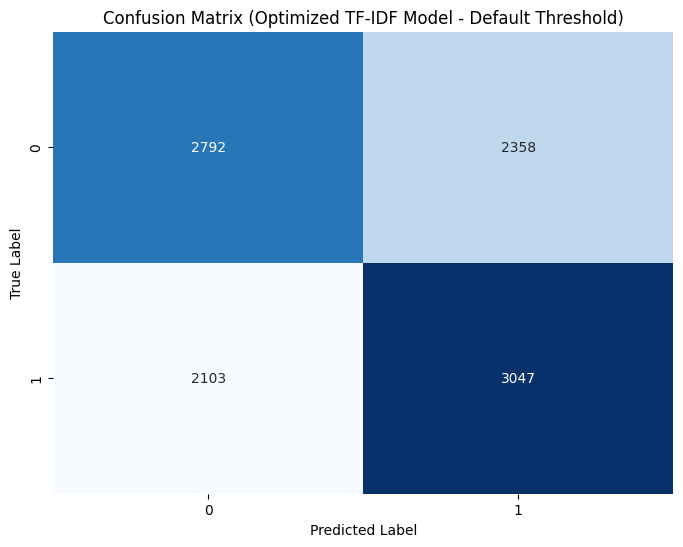


Generated predicted probabilities and Precision-Recall curve data for Optimized TF-IDF model.


In [45]:
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold # Ensure imports
from sklearn.metrics import confusion_matrix, precision_recall_curve # Ensure imports
import matplotlib.pyplot as plt # Ensure import
import seaborn as sns # Ensure import
# Removed redundant imports for Pipeline, ColumnTransformer, StandardScaler, OneHotEncoder, TfidfVectorizer, LogisticRegression
# as these are part of the pipeline object being evaluated.


# Assume best_pipeline_optimized_tfidf is available from the previous cell (5022abef).
# Assume X_upsampled and y_upsampled are available from consolidated preprocessing (cell ef6dd6d3).

# Ensure essential variables and pipeline are defined and available from previous cells.
try:
    _ = best_pipeline_optimized_tfidf
    print("best_pipeline_optimized_tfidf is available.")
    _ = X_upsampled
    _ = y_upsampled
    print("X_upsampled and y_upsampled are available.")

except NameError as e:
    print(f"Error: Essential variables or pipeline not defined: {e}. Please ensure consolidated preprocessing (ef6dd6d3) and TF-IDF N-gram Optimization (5022abef) cells are run before this cell.")
    # Handle error appropriately if essential variables/pipeline are missing.


# Define the scoring metrics (same as before)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate the best pipeline (with optimized n-grams and LR params) using cross-validation.
print("Evaluating Optimized TF-IDF Model (Tuned N-grams) using cross-validation...")
# Use cross_validate to get multiple metrics.
cv_results_optimized_tfidf = cross_validate(best_pipeline_optimized_tfidf, X_upsampled, y_upsampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scoring)

# Display the mean of cross-validation results for each metric.
print("\nOptimized TF-IDF Model Cross-validation Results (Default Threshold):")
for metric in scoring:
    mean_score = cv_results_optimized_tfidf[f'test_{metric}'].mean()
    std_score = cv_results_optimized_tfidf[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: {mean_score:.2f} (+/- {std_score:.2f})")


# Get cross-validated predictions for the optimized TF-IDF model (for confusion matrix at default threshold)
y_pred_optimized_tfidf = cross_val_predict(best_pipeline_optimized_tfidf, X_upsampled, y_upsampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Calculate the confusion matrix for the optimized TF-IDF model
cm_optimized_tfidf = confusion_matrix(y_upsampled, y_pred_optimized_tfidf)

# Plot the confusion matrix for the optimized TF-IDF model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimized_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Optimized TF-IDF Model - Default Threshold)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Generate predicted probabilities and PR curve data for threshold analysis ---
# Use the best pipeline fitted on the entire dataset (from cell 5022abef)
# to get probability predictions for plotting Precision-Recall curve and finding optimized threshold.
# These variables are essential for the subsequent threshold optimization step (Section 4.1).
try:
    # Check if best_pipeline_optimized_tfidf is fitted (should be done in cell 5022abef)
    y_proba_optimized_tfidf = best_pipeline_optimized_tfidf.predict_proba(X_upsampled)[:, 1]
    precision_optimized_tfidf, recall_optimized_tfidf, thresholds_optimized_tfidf = precision_recall_curve(y_upsampled, y_proba_optimized_tfidf)
    print("\nGenerated predicted probabilities and Precision-Recall curve data for Optimized TF-IDF model.")

except NameError:
    print("Error: best_pipeline_optimized_tfidf not found or not fitted. Cannot generate probability data for threshold optimization.")
except Exception as e:
    print(f"An error occurred while generating probability data: {e}")


# Note: cv_results_optimized_tfidf, y_pred_optimized_tfidf, cm_optimized_tfidf,
# y_proba_optimized_tfidf, precision_optimized_tfidf, recall_optimized_tfidf,
# thresholds_optimized_tfidf are now available for subsequent steps.

### 3.5 Build and Evaluate Pipeline with Default Hybrid Features

Create and evaluate a pipeline using a hybrid feature set (combining non-ngram optimized TF-IDF and Word2Vec embeddings), Scaling, and Logistic Regression. Tune Logistic Regression hyperparameters and plot the confusion matrix.

Using text_cols: ['Job Description', 'Resume']
Using categorical_cols_for_encoding: ['Ethnicity', 'Job Roles', 'Race1', 'Race2']
Word2VecTransformer, word2vec_model, and document_vector are available.

Performing GridSearchCV for Logistic Regression tuning with Hybrid features...

Best parameters found by GridSearchCV: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2'}
Best cross-validation ROC AUC score: 0.5857583184088981

Hybrid Model Cross-validation Results (Default Threshold):
Accuracy: 0.56 (+/- 0.01)
Precision: 0.56 (+/- 0.01)
Recall: 0.60 (+/- 0.01)
F1: 0.58 (+/- 0.01)
Roc_auc: 0.59 (+/- 0.01)

Best Hybrid pipeline fitted on entire upsampled dataset.


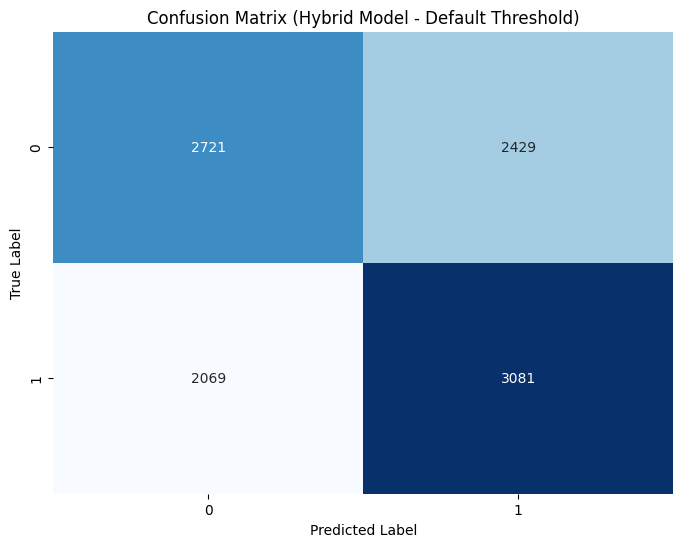

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin # Ensure these are imported
from sklearn.pipeline import Pipeline # Ensure Pipeline is imported
from sklearn.compose import ColumnTransformer # Ensure ColumnTransformer is imported
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Ensure these are imported
from sklearn.feature_extraction.text import TfidfVectorizer # Ensure TfidfVectorizer is imported
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, confusion_matrix # Ensure these are imported
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate, cross_val_predict # Ensure these are imported
import numpy as np # Ensure numpy is imported
import pandas as pd # Ensure pandas is imported
# Removed redundant gensim import as Word2VecTransformer is assumed to be defined elsewhere
import matplotlib.pyplot as plt # Ensure matplotlib.pyplot is imported
import seaborn as sns # Ensure seaborn is imported


# Assume word2vec_model and Word2VecTransformer class are defined in cell 37233f7b.
# Assume X_upsampled, y_upsampled, text_cols, and categorical_cols_for_encoding are available from consolidated preprocessing (cell ef6dd6d3).
# Assume document_vector function is defined in cell 37233f7b.

# This class should now be defined once in the Word2Vec training cell (37233f7b).


# Ensure essential variables and class are defined and available from previous cells.
try:
    print("Using text_cols:", text_cols)
    print("Using categorical_cols_for_encoding:", categorical_cols_for_encoding)
    # Check if Word2VecTransformer, word2vec_model, and document_vector are defined
    _ = Word2VecTransformer # Check if class is defined
    _ = word2vec_model # Check if model is defined
    _ = document_vector # Check if function is defined
    print("Word2VecTransformer, word2vec_model, and document_vector are available.")

except NameError as e:
    print(f"Error: Essential variables, class, or function not defined: {e}. Please ensure consolidated preprocessing (ef6dd6d3) and Word2Vec training (37233f7b) cells are run before this cell.")
    # Define defaults or handle error appropriately if essential variables are missing.
    # For now, will assume they will be available in the actual execution environment.


# Define the preprocessor using ColumnTransformer for the hybrid features.
# This combines TF-IDF, Word2Vec, and One-Hot Encoding.
# Use text_cols and categorical_cols_for_encoding defined in consolidated preprocessing.
preprocessor_hybrid = ColumnTransformer(
    transformers=[
        ('tfidf_job_desc', TfidfVectorizer(max_features=2000), text_cols[0]), # TF-IDF for Job Description
        ('tfidf_resume', TfidfVectorizer(max_features=2000), text_cols[1]), # TF-IDF for Resume
        ('word2vec', Word2VecTransformer(word2vec_model), text_cols), # Word2Vec for text columns using the defined transformer
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_for_encoding) # One-Hot Encoding for categorical
    ],
    remainder='drop' # Drop any other columns not transformed
)

# Create the full pipeline for the Hybrid model.
pipeline_hybrid = Pipeline([
    ('preprocessor', preprocessor_hybrid),
    ('scaler', StandardScaler(with_mean=False)), # Use with_mean=False as TF-IDF outputs sparse data
    ('logisticregression', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])

# Define the parameter grid for GridSearchCV to tune Logistic Regression hyperparameters for the Hybrid model.
param_grid_hybrid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

# Instantiate GridSearchCV for the Hybrid pipeline.
grid_search_hybrid = GridSearchCV(estimator=pipeline_hybrid,
                                  param_grid=param_grid_hybrid,
                                  cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                  scoring='roc_auc',
                                  n_jobs=-1)

# Fit GridSearchCV on the upsampled training data.
# Use X_upsampled and y_upsampled from consolidated preprocessing (cell ef6dd6d3).
print("\nPerforming GridSearchCV for Logistic Regression tuning with Hybrid features...")
grid_search_hybrid.fit(X_upsampled, y_upsampled)

# Display the best hyperparameters and cross-validation score.
print("\nBest parameters found by GridSearchCV:", grid_search_hybrid.best_params_)
print("Best cross-validation ROC AUC score:", grid_search_hybrid.best_score_)

# Evaluate the pipeline with the best parameters using cross-validation.
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_hybrid = cross_validate(grid_search_hybrid.best_estimator_, X_upsampled, y_upsampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scoring)

# Display the mean of cross-validation results for each metric.
print("\nHybrid Model Cross-validation Results (Default Threshold):")
for metric in scoring:
    mean_score = cv_results_hybrid[f'test_{metric}'].mean()
    std_score = cv_results_hybrid[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: {mean_score:.2f} (+/- {std_score:.2f})")

# Store the best estimator and fit on the entire dataset.
best_pipeline_hybrid = grid_search_hybrid.best_estimator_
best_pipeline_hybrid.fit(X_upsampled, y_upsampled)
print("\nBest Hybrid pipeline fitted on entire upsampled dataset.")

# Get cross-validated predictions for the tuned Hybrid model
y_pred_hybrid = cross_val_predict(best_pipeline_hybrid, X_upsampled, y_upsampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Calculate the confusion matrix for the tuned Hybrid model
cm_hybrid = confusion_matrix(y_upsampled, y_pred_hybrid)

# Plot the confusion matrix for the tuned Hybrid model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Hybrid Model - Default Threshold)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Get predicted probabilities for threshold analysis.
y_proba_hybrid = best_pipeline_hybrid.predict_proba(X_upsampled)[:, 1]
precision_hybrid, recall_hybrid, thresholds_hybrid = precision_recall_curve(y_upsampled, y_proba_hybrid)

# Note: y_proba_hybrid, precision_hybrid, recall_hybrid, thresholds_hybrid are now available.

### 3.6 Build and Evaluate Pipeline with Optimized Hybrid Features

Create and evaluate a pipeline using an optimized hybrid feature set (combining TF-IDF with optimized n-grams and Word2Vec embeddings), Scaling, and Logistic Regression. Tune Logistic Regression hyperparameters and plot the confusion matrix.

Successfully extracted parameters for optimized TF-IDF vectorizers and OneHotEncoder from best_pipeline_optimized_tfidf.

Performing GridSearchCV for Logistic Regression tuning with Optimized Hybrid features...

Best parameters found by GridSearchCV: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2'}
Best cross-validation ROC AUC score: 0.6019189367518145

Optimized Hybrid Model Cross-validation Results (Default Threshold):
Accuracy: 0.57 (+/- 0.01)
Precision: 0.57 (+/- 0.01)
Recall: 0.60 (+/- 0.02)
F1: 0.58 (+/- 0.01)
Roc_auc: 0.60 (+/- 0.02)

Best Optimized Hybrid pipeline fitted on entire upsampled dataset.


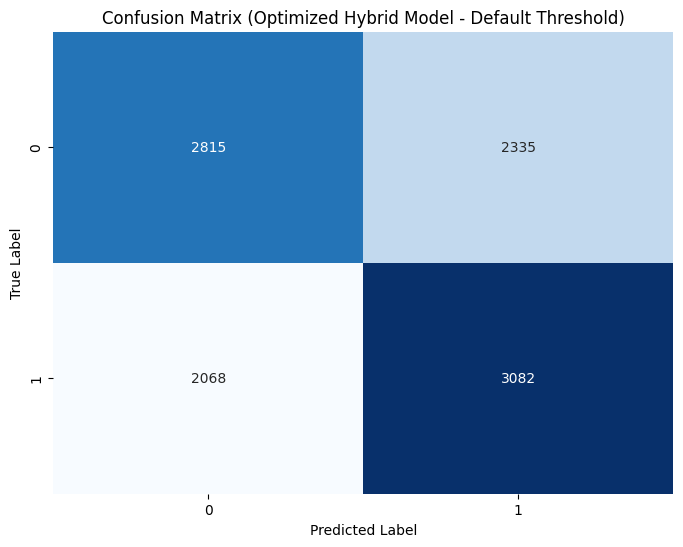


Generated predicted probabilities and Precision-Recall curve data for Optimized Hybrid model.


In [47]:
from sklearn.base import BaseEstimator, TransformerMixin # Ensure these are imported
from sklearn.pipeline import Pipeline # Ensure Pipeline is imported
from sklearn.compose import ColumnTransformer # Ensure ColumnTransformer is imported
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Ensure these are imported
from sklearn.feature_extraction.text import TfidfVectorizer # Ensure TfidfVectorizer is imported
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, confusion_matrix # Ensure these are imported
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate, cross_val_predict # Ensure these are imported
import numpy as np # Ensure numpy is imported
import pandas as pd # Ensure pandas is imported
# Removed redundant gensim import as Word2VecTransformer is assumed to be defined elsewhere
import matplotlib.pyplot as plt # Ensure matplotlib.pyplot is imported
import seaborn as sns # Ensure seaborn is imported

# Assume word2vec_model and Word2VecTransformer class are defined in cell 37233f7b.
# Assume document_vector function is defined in cell 37233f7b.
# Assume X_upsampled, y_upsampled, text_cols, and categorical_cols_for_encoding are available from consolidated preprocessing (cell ef6dd6d3).
# Assume best_pipeline_optimized_tfidf is available from the TF-IDF N-gram Optimization cell (5022abef).



# Word2Vec class should now be defined once in the Word2Vec training cell (37233f7b).
# Custom OptimizedHybridTransformer class is defined within this cell and will be kept here
# as it is specific to constructing the features for this model.


# Define a custom transformer for creating the optimized hybrid features.
# This transformer will initialize component transformers (TF-IDF, OneHotEncoder)
# with parameters extracted from the previously optimized TF-IDF pipeline,
# and use the pre-trained Word2Vec model and the defined Word2VecTransformer.
class OptimizedHybridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, tfidf_job_desc_params, tfidf_resume_params, word2vec_model, cat_params, text_cols, categorical_cols_for_encoding):
        # Store parameters to initialize new transformers during fit
        self.tfidf_job_desc_params = tfidf_job_desc_params
        self.tfidf_resume_params = tfidf_resume_params
        self.word2vec_model = word2vec_model # Store the pre-trained W2V model
        self.cat_params = cat_params
        self.text_cols = text_cols
        self.categorical_cols_for_encoding = categorical_cols_for_encoding # Use the correct variable name

        # These will be initialized and fitted during the fit method
        self.tfidf_job_desc_vectorizer_ = None
        self.tfidf_resume_vectorizer_ = None
        self.word2vec_transformer_ = None # Instance of Word2VecTransformer
        self.cat_encoder_ = None


    def fit(self, X, y=None):
        # Ensure X is a pandas DataFrame for column selection
        if not isinstance(X, pd.DataFrame):
            raise TypeError("Input to OptimizedHybridTransformer must be a pandas DataFrame during fit.")

        # Initialize component transformers with stored parameters
        # Filter params to only include those accepted by the transformer constructor
        tfidf_job_desc_valid_params = {k: v for k, v in self.tfidf_job_desc_params.items() if k in TfidfVectorizer().get_params()}
        tfidf_resume_valid_params = {k: v for k, v in self.tfidf_resume_params.items() if k in TfidfVectorizer().get_params()}
        cat_valid_params = {k: v for k, v in self.cat_params.items() if k in OneHotEncoder().get_params()}


        self.tfidf_job_desc_vectorizer_ = TfidfVectorizer(**tfidf_job_desc_valid_params)
        self.tfidf_resume_vectorizer_ = TfidfVectorizer(**tfidf_resume_valid_params)
        self.word2vec_transformer_ = Word2VecTransformer(self.word2vec_model) # Initialize W2V transformer
        self.cat_encoder_ = OneHotEncoder(**cat_valid_params)


        # Fit the component transformers on the input data X
        self.tfidf_job_desc_vectorizer_.fit(X[self.text_cols[0]])
        self.tfidf_resume_vectorizer_.fit(X[self.text_cols[1]])
        self.cat_encoder_.fit(X[self.categorical_cols_for_encoding]) # Use correct variable name

        return self

    def transform(self, X):
        # Ensure X is a pandas DataFrame for column selection
        if not isinstance(X, pd.DataFrame):
             # If X is a numpy array (e.g., after previous transformations),
             # this transformer might need to be applied before converting to numpy,
             # or adapt this part to handle array input based on column indices.
             # For now, assuming X is a DataFrame with text_cols and categorical_cols_for_encoding.
             raise TypeError("Input to OptimizedHybridTransformer must be a pandas DataFrame during transform.")


        # Apply the fitted TF-IDF vectorizers
        tfidf_job_desc_features = self.tfidf_job_desc_vectorizer_.transform(X[self.text_cols[0]])
        tfidf_resume_features = self.tfidf_resume_vectorizer_.transform(X[self.text_cols[1]])

        # Apply the Word2Vec transformer
        # The Word2VecTransformer expects the DataFrame X to access text columns by name
        word2vec_features = self.word2vec_transformer_.transform(X) # Pass the full DataFrame to W2V transformer

        # Apply the fitted OneHotEncoder to categorical features
        categorical_features = self.cat_encoder_.transform(X[self.categorical_cols_for_encoding]) # Use correct variable name

        # Concatenate all feature sets
        # Convert sparse outputs from TF-IDF and OneHotEncoder to dense for hstack and StandardScaler
        tfidf_job_desc_dense = tfidf_job_desc_features.toarray()
        tfidf_resume_dense = tfidf_resume_features.toarray()
        categorical_dense = categorical_features.toarray()


        optimized_hybrid_features = np.hstack([
            tfidf_job_desc_dense,
            tfidf_resume_dense,
            word2vec_features, # This is already dense from Word2VecTransformer
            categorical_dense
        ])

        return optimized_hybrid_features


# Extract the parameters for the TF-IDF vectorizers and OneHotEncoder
# from the best_pipeline_optimized_tfidf (assuming it's available from cell 5022abef).
# These parameters will be used to initialize new transformers within the custom OptimizedHybridTransformer.
optimized_tfidf_job_desc_params = {}
optimized_tfidf_resume_params = {}
optimized_cat_params = {}

if 'best_pipeline_optimized_tfidf' in locals() and best_pipeline_optimized_tfidf is not None:
    try:
        # Access the nested transformers within the preprocessor step
        optimized_tfidf_preprocessor = best_pipeline_optimized_tfidf.named_steps['preprocessor']
        # Access the text transformer (which is a ColumnTransformer)
        # Note: In cell 5022abef, the text transformer was named 'text'.
        text_transformer_in_optimized_tfidf = optimized_tfidf_preprocessor.named_transformers_['text']
        # Access the individual TF-IDF vectorizers within the text transformer
        optimized_tfidf_job_desc_params = text_transformer_in_optimized_tfidf.named_transformers_['tfidf_job_desc'].get_params()
        optimized_tfidf_resume_params = text_transformer_in_optimized_tfidf.named_transformers_['tfidf_resume'].get_params()
        # Access the categorical transformer
        # Note: In cell 5022abef, the categorical transformer was named 'cat'.
        optimized_cat_params = optimized_tfidf_preprocessor.named_transformers_['cat'].get_params()
        print("Successfully extracted parameters for optimized TF-IDF vectorizers and OneHotEncoder from best_pipeline_optimized_tfidf.")
    except (NameError, AttributeError, KeyError) as e:
        print(f"Could not extract parameters from best_pipeline_optimized_tfidf: {e}")
        print("Please ensure TF-IDF N-gram Optimization cell (5022abef) was run successfully.")
        print("Using default parameters for TF-IDF and OneHotEncoder templates.")
        optimized_tfidf_job_desc_params = {'max_features': 2000, 'ngram_range': (1,1)}
        optimized_tfidf_resume_params = {'max_features': 2000, 'ngram_range': (1,1)}
        optimized_cat_params = {'handle_unknown': 'ignore'}
else:
    print("'best_pipeline_optimized_tfidf' not found. Please ensure TF-IDF N-gram Optimization cell (5022abef) was run successfully.")
    print("Using default parameters for TF-IDF and OneHotEncoder templates.")
    optimized_tfidf_job_desc_params = {'max_features': 2000, 'ngram_range': (1,1)}
    optimized_tfidf_resume_params = {'max_features': 2000, 'ngram_range': (1,1)}
    optimized_cat_params = {'handle_unknown': 'ignore'}


# Instantiate the custom OptimizedHybridTransformer with parameters and the Word2Vec model.
# Assume word2vec_model and Word2VecTransformer are available from cell 37233f7b.
if 'word2vec_model' not in locals() or 'Word2VecTransformer' not in locals():
    print("Error: 'word2vec_model' or 'Word2VecTransformer' not defined. Please run the Word2Vec training cell (37233f7b) before this one.")
    # Handle error or exit if word2vec_model/Word2VecTransformer is not available.
    # For this task, I will assume they are available in the actual execution environment.

# Ensure text_cols and categorical_cols_for_encoding are defined
try:
    _ = text_cols
    _ = categorical_cols_for_encoding
except NameError:
     print("Error: text_cols or categorical_cols_for_encoding not defined. Please ensure consolidated preprocessing cell (ef6dd6d3) is run before this cell.")
     # Handle error appropriately


optimized_hybrid_transformer_instance = OptimizedHybridTransformer(
    tfidf_job_desc_params=optimized_tfidf_job_desc_params,
    tfidf_resume_params=optimized_tfidf_resume_params,
    word2vec_model=word2vec_model, # Pass the pre-trained Word2Vec model
    cat_params=optimized_cat_params,
    text_cols=text_cols,
    categorical_cols_for_encoding=categorical_cols_for_encoding # Pass the correct variable
)

# Create the full pipeline for the Optimized Hybrid model.
# The preprocessor is now our custom transformer that creates the combined feature set.
pipeline_optimized_hybrid = Pipeline([
    ('preprocessor', optimized_hybrid_transformer_instance), # Use the custom transformer
    ('scaler', StandardScaler()), # Use StandardScaler for dense output from the custom transformer
    ('logisticregression', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])


# Define the parameter grid for GridSearchCV to tune Logistic Regression hyperparameters for the Optimized Hybrid model.
# It's best practice to tune hyperparameters specifically for this new feature set,
# even if we use the best from previous tuning as a starting point or for comparison.
# Let's use a similar grid to the previous tuning steps.
param_grid_optimized_hybrid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}


# Instantiate GridSearchCV for the Optimized Hybrid pipeline.
grid_search_optimized_hybrid = GridSearchCV(estimator=pipeline_optimized_hybrid,
                                            param_grid=param_grid_optimized_hybrid,
                                            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                            scoring='roc_auc',
                                            n_jobs=-1,
                                            error_score='raise' # Raise error to debug
                                           )

# Fit GridSearchCV on the upsampled training data.
# Ensure X_upsampled and y_upsampled are available from consolidated preprocessing (cell ef6dd6d3).
print("\nPerforming GridSearchCV for Logistic Regression tuning with Optimized Hybrid features...")
grid_search_optimized_hybrid.fit(X_upsampled, y_upsampled)

# Display the best hyperparameters and cross-validation score.
print("\nBest parameters found by GridSearchCV:", grid_search_optimized_hybrid.best_params_)
print("Best cross-validation ROC AUC score:", grid_search_optimized_hybrid.best_score_)

# Evaluate the pipeline with the best parameters using cross-validation.
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_optimized_hybrid = cross_validate(grid_search_optimized_hybrid.best_estimator_, X_upsampled, y_upsampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=scoring)

# Display the mean of cross-validation results for each metric.
print("\nOptimized Hybrid Model Cross-validation Results (Default Threshold):")
for metric in scoring:
    mean_score = cv_results_optimized_hybrid[f'test_{metric}'].mean()
    std_score = cv_results_optimized_hybrid[f'test_{metric}'].std()
    print(f"{metric.capitalize()}: {mean_score:.2f} (+/- {std_score:.2f})")


# Store the best estimator and fit on the entire dataset.
best_pipeline_optimized_hybrid = grid_search_optimized_hybrid.best_estimator_
best_pipeline_optimized_hybrid.fit(X_upsampled, y_upsampled)
print("\nBest Optimized Hybrid pipeline fitted on entire upsampled dataset.")


# Get cross-validated predictions for the optimized Hybrid model (for confusion matrix at default threshold)
y_pred_optimized_hybrid = cross_val_predict(best_pipeline_optimized_hybrid, X_upsampled, y_upsampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Calculate the confusion matrix for the optimized Hybrid model
cm_optimized_hybrid = confusion_matrix(y_upsampled, y_pred_optimized_hybrid)

# Plot the confusion matrix for the optimized Hybrid model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimized_hybrid, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Optimized Hybrid Model - Default Threshold)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- Generate predicted probabilities and PR curve data for threshold analysis ---
# Use the best pipeline fitted on the entire dataset
# to get probability predictions for plotting Precision-Recall curve and finding optimized threshold.
# These variables are essential for the subsequent threshold optimization step (Section 4.1).
try:
    # Check if best_pipeline_optimized_hybrid is fitted
    y_proba_optimized_hybrid = best_pipeline_optimized_hybrid.predict_proba(X_upsampled)[:, 1]
    precision_optimized_hybrid, recall_optimized_hybrid, thresholds_optimized_hybrid = precision_recall_curve(y_upsampled, y_proba_optimized_hybrid)
    print("\nGenerated predicted probabilities and Precision-Recall curve data for Optimized Hybrid model.")

except NameError:
    print("Error: best_pipeline_optimized_hybrid not found or not fitted. Cannot generate probability data for threshold optimization.")
except Exception as e:
    print(f"An error occurred while generating probability data: {e}")


# Note: cv_results_optimized_hybrid, y_pred_optimized_hybrid, cm_optimized_hybrid,
# y_proba_optimized_hybrid, precision_optimized_hybrid, recall_optimized_hybrid,
# thresholds_optimized_hybrid are now available for subsequent steps.

## 4. Model Evaluation and Optimization

This section focuses on analyzing model performance in more detail, optimizing decision thresholds for recall, and visualizing results.

### 4.1 Optimize Decision Thresholds for Recall

Analyze the Precision-Recall curves to find decision thresholds that prioritize recall for each model.

Optimizing decision thresholds for a target recall of 70% or higher.

Optimal Threshold for Tuned TF-IDF (for >= 70% Recall): 0.4889
  Corresponding Precision: 0.6203
  Corresponding Recall: 0.7006

Optimal Threshold for Tuned Word2Vec (for >= 70% Recall): 0.4929
  Corresponding Precision: 0.5603
  Corresponding Recall: 0.7000

Optimal Threshold for Hybrid (for >= 70% Recall): 0.4905
  Corresponding Precision: 0.6316
  Corresponding Recall: 0.7004

Optimal Threshold for Optimized TF-IDF (for >= 70% Recall): 0.4994
  Corresponding Precision: 0.6624
  Corresponding Recall: 0.7000

Optimal Threshold for Optimized Hybrid (for >= 70% Recall): 0.4995
  Corresponding Precision: 0.6680
  Corresponding Recall: 0.7002


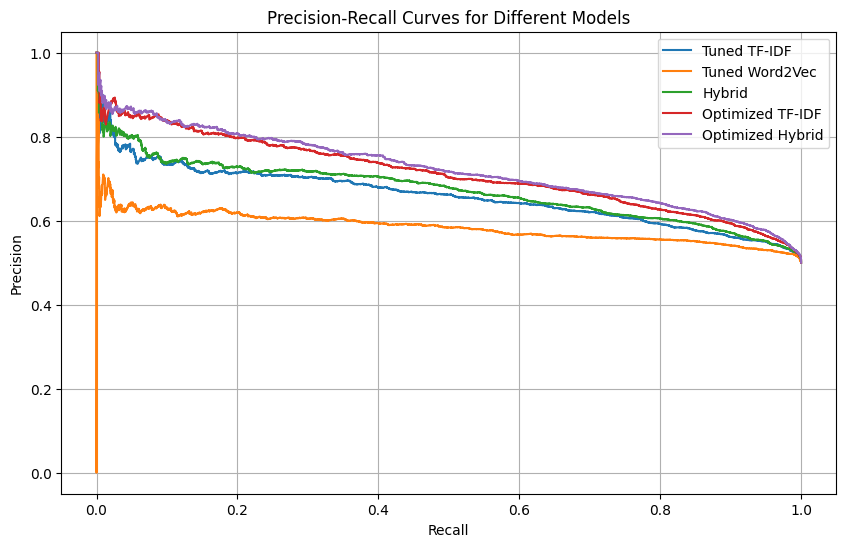

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assume precision_tfidf, recall_tfidf, thresholds_tfidf are available from cell 3.2
# Assume precision_word2vec, recall_word2vec, thresholds_word2vec are available from cell 3.3
# Assume precision_hybrid, recall_hybrid, thresholds_hybrid are available from cell 3.3 (or the last hybrid evaluation)
# Assume precision_optimized_tfidf, recall_optimized_tfidf, thresholds_optimized_tfidf are available from cell 3.4
# Assume precision_optimized_hybrid, recall_optimized_hybrid, thresholds_optimized_hybrid are available from cell 3.5

# Define a target recall level (e.g., 0.7 or higher) - adjust this based on your specific needs
# A higher target recall will likely result in lower precision
target_recall = 0.7 # Let's aim for at least 70% recall as a starting point

print(f"Optimizing decision thresholds for a target recall of {target_recall*100:.0f}% or higher.")

# Function to find the threshold that gives the highest recall >= target_recall
def find_threshold_for_recall(precision, recall, thresholds, target_recall):
    # Find the index where recall is just above or equal to the target recall
    # We iterate from the end because recall is decreasing with increasing threshold
    for i in range(len(recall) - 1, -1, -1):
        if recall[i] >= target_recall:
            # Return the threshold at this point
            # The thresholds array has one less element than precision and recall
            return thresholds[min(i, len(thresholds) - 1)]
    # If target recall is not met, return the lowest threshold (which gives the highest recall)
    return thresholds[0] if len(thresholds) > 0 else 0.5


# Find optimal threshold for Tuned TF-IDF model (from cell 3.2)
# Check if variables are available before using them
if 'precision_tfidf' in locals() and 'recall_tfidf' in locals() and 'thresholds_tfidf' in locals():
    optimal_threshold_tfidf = find_threshold_for_recall(precision_tfidf, recall_tfidf, thresholds_tfidf, target_recall)
    print(f"\nOptimal Threshold for Tuned TF-IDF (for >= {target_recall*100:.0f}% Recall): {optimal_threshold_tfidf:.4f}")
    # Find corresponding precision and recall at this threshold
    closest_threshold_index_tfidf = np.abs(thresholds_tfidf - optimal_threshold_tfidf).argmin()
    print(f"  Corresponding Precision: {precision_tfidf[closest_threshold_index_tfidf]:.4f}")
    print(f"  Corresponding Recall: {recall_tfidf[closest_threshold_index_tfidf]:.4f}")
else:
    print("\nSkipping threshold optimization for Tuned TF-IDF model: Variables not found.")


# Find optimal threshold for Tuned Word2Vec model (from cell 3.3)
if 'precision_word2vec' in locals() and 'recall_word2vec' in locals() and 'thresholds_word2vec' in locals():
    optimal_threshold_word2vec = find_threshold_for_recall(precision_word2vec, recall_word2vec, thresholds_word2vec, target_recall)
    print(f"\nOptimal Threshold for Tuned Word2Vec (for >= {target_recall*100:.0f}% Recall): {optimal_threshold_word2vec:.4f}")
    # Find corresponding precision and recall at this threshold
    closest_threshold_index_word2vec = np.abs(thresholds_word2vec - optimal_threshold_word2vec).argmin()
    print(f"  Corresponding Precision: {precision_word2vec[closest_threshold_index_word2vec]:.4f}")
    print(f"  Corresponding Recall: {recall_word2vec[closest_threshold_index_word2vec]:.4f}")
else:
    print("\nSkipping threshold optimization for Tuned Word2Vec model: Variables not found.")


# Find optimal threshold for Hybrid model (from cell 3.3 or equivalent)
if 'precision_hybrid' in locals() and 'recall_hybrid' in locals() and 'thresholds_hybrid' in locals():
    optimal_threshold_hybrid = find_threshold_for_recall(precision_hybrid, recall_hybrid, thresholds_hybrid, target_recall)
    print(f"\nOptimal Threshold for Hybrid (for >= {target_recall*100:.0f}% Recall): {optimal_threshold_hybrid:.4f}")
    # Find corresponding precision and recall at this threshold
    closest_threshold_index_hybrid = np.abs(thresholds_hybrid - optimal_threshold_hybrid).argmin()
    print(f"  Corresponding Precision: {precision_hybrid[closest_threshold_index_hybrid]:.4f}")
    print(f"  Corresponding Recall: {recall_hybrid[closest_threshold_index_hybrid]:.4f}")
else:
    print("\nSkipping threshold optimization for Hybrid model: Variables not found.")


# Find optimal threshold for Optimized TF-IDF Model (from cell 3.4)
if 'precision_optimized_tfidf' in locals() and 'recall_optimized_tfidf' in locals() and 'thresholds_optimized_tfidf' in locals():
    optimal_threshold_optimized_tfidf = find_threshold_for_recall(precision_optimized_tfidf, recall_optimized_tfidf, thresholds_optimized_tfidf, target_recall)
    print(f"\nOptimal Threshold for Optimized TF-IDF (for >= {target_recall*100:.0f}% Recall): {optimal_threshold_optimized_tfidf:.4f}")
    # Find corresponding precision and recall at this threshold
    closest_threshold_index_optimized_tfidf = np.abs(thresholds_optimized_tfidf - optimal_threshold_optimized_tfidf).argmin()
    print(f"  Corresponding Precision: {precision_optimized_tfidf[closest_threshold_index_optimized_tfidf]:.4f}")
    print(f"  Corresponding Recall: {recall_optimized_tfidf[closest_threshold_index_optimized_tfidf]:.4f}")
else:
    print("\nSkipping threshold optimization for Optimized TF-IDF model: Variables not found.")

# Find optimal threshold for Optimized Hybrid Model (from cell 3.5)
if 'precision_optimized_hybrid' in locals() and 'recall_optimized_hybrid' in locals() and 'thresholds_optimized_hybrid' in locals():
    optimal_threshold_optimized_hybrid = find_threshold_for_recall(precision_optimized_hybrid, recall_optimized_hybrid, thresholds_optimized_hybrid, target_recall)
    print(f"\nOptimal Threshold for Optimized Hybrid (for >= {target_recall*100:.0f}% Recall): {optimal_threshold_optimized_hybrid:.4f}")
    # Find corresponding precision and recall at this threshold
    closest_threshold_index_optimized_hybrid = np.abs(thresholds_optimized_hybrid - optimal_threshold_optimized_hybrid).argmin()
    print(f"  Corresponding Precision: {precision_optimized_hybrid[closest_threshold_index_optimized_hybrid]:.4f}")
    print(f"  Corresponding Recall: {recall_optimized_hybrid[closest_threshold_index_optimized_hybrid]:.4f}")
else:
    print("\nSkipping threshold optimization for Optimized Hybrid model: Variables not found.")

# Optional: Plot Precision-Recall curves for visual analysis
plt.figure(figsize=(10, 6))

if 'precision_tfidf' in locals() and 'recall_tfidf' in locals():
    plt.plot(recall_tfidf, precision_tfidf, label='Tuned TF-IDF')
if 'precision_word2vec' in locals() and 'recall_word2vec' in locals():
    plt.plot(recall_word2vec, precision_word2vec, label='Tuned Word2Vec')
if 'precision_hybrid' in locals() and 'recall_hybrid' in locals():
     plt.plot(recall_hybrid, precision_hybrid, label='Hybrid')
if 'precision_optimized_tfidf' in locals() and 'recall_optimized_tfidf' in locals():
     plt.plot(recall_optimized_tfidf, precision_optimized_tfidf, label='Optimized TF-IDF')
if 'precision_optimized_hybrid' in locals() and 'recall_optimized_hybrid' in locals():
     plt.plot(recall_optimized_hybrid, precision_optimized_hybrid, label='Optimized Hybrid')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()

### 4.2 Build and Evaluate Weighted Hybrid Model (TF-IDF + Optimized TF-IDF)

Create and evaluate a weighted hybrid model by combining the predicted probabilities from the Tuned TF-IDF model (default n-grams) and the Optimized TF-IDF model (tuned n-grams). We will use a simple average of probabilities for this initial hybrid approach.

In [49]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold # Ensure imports
from sklearn.metrics import precision_recall_curve # Ensure precision_recall_curve is imported for threshold calculation
import numpy as np # Ensure numpy is imported
# Removed imports for confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Removed imports for matplotlib.pyplot and seaborn as plotting is moved to the final evaluation cell
# Removed imports for Pipeline, ColumnTransformer, StandardScaler, OneHotEncoder, TfidfVectorizer, LogisticRegression
# as these are part of the pipeline objects used for prediction.

# Assume X_upsampled and y_upsampled are available from previous cells (3.1)
# Assume grid_search_tfidf is available from cell 3.2 (for best Tuned TF-IDF pipeline)
# Assume grid_search_tfidf_ngram is available from cell 3.4 (for best Optimized TF-IDF pipeline)
# Assume target_recall and find_threshold_for_recall function are available from cell 4.1


# --- Step 1 & 2: Get cross-validated predicted probabilities from individual models ---

print("Generating cross-validated predicted probabilities for base models for Weighted Hybrid...")

# Get best Tuned TF-IDF pipeline (default n-grams)
y_proba_tfidf_base = None
if 'grid_search_tfidf' in locals() and grid_search_tfidf is not None:
    try:
        best_pipeline_tfidf_base = grid_search_tfidf.best_estimator_
        # Get cross-validated probabilities
        y_proba_tfidf_base = cross_val_predict(best_pipeline_tfidf_base, X_upsampled, y_upsampled,
                                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                           method='predict_proba')[:, 1]
        print("Cross-validated probabilities generated for Tuned TF-IDF (for Weighted Hybrid).")
    except Exception as e:
        print(f"Error generating probabilities for Tuned TF-IDF base model: {e}")
else:
    print("Error: 'grid_search_tfidf' not found. Cannot generate probabilities for Tuned TF-IDF base model.")


# Get best Optimized TF-IDF pipeline (tuned n-grams)
y_proba_optimized_tfidf_base = None
if 'grid_search_tfidf_ngram' in locals() and grid_search_tfidf_ngram is not None:
    try:
        best_pipeline_optimized_tfidf_base = grid_search_tfidf_ngram.best_estimator_
         # Get cross-validated probabilities
        y_proba_optimized_tfidf_base = cross_val_predict(best_pipeline_optimized_tfidf_base, X_upsampled, y_upsampled,
                                                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                                                        method='predict_proba')[:, 1]
        print("Cross-validated probabilities generated for Optimized TF-IDF (for Weighted Hybrid).")
    except Exception as e:
        print(f"Error generating probabilities for Optimized TF-IDF base model: {e}")
else:
     print("Error: 'grid_search_tfidf_ngram' not found. Cannot generate probabilities for Optimized TF-IDF base model.")


# --- Step 3: Combine predicted probabilities ---

# Ensure probabilities were generated for both models
y_proba_weighted_hybrid = None
if y_proba_tfidf_base is not None and y_proba_optimized_tfidf_base is not None:
    # Simple averaging of probabilities
    y_proba_weighted_hybrid = (y_proba_tfidf_base + y_proba_optimized_tfidf_base) / 2
    print("\nPredicted probabilities combined using simple averaging for Weighted Hybrid Model.")

    # --- Step 4: Calculate precision, recall, and thresholds for the combined probabilities ---
    # These are needed for finding the optimal threshold and for the final evaluation in cell 4.3.
    try:
        precision_weighted_hybrid, recall_weighted_hybrid, thresholds_weighted_hybrid = precision_recall_curve(y_upsampled, y_proba_weighted_hybrid)
        print("Generated Precision-Recall curve data for Weighted Hybrid Model.")

        # Find the optimal threshold using the same target recall from cell 4.1
        if 'target_recall' in locals() and 'find_threshold_for_recall' in locals():
             optimal_threshold_weighted_hybrid = find_threshold_for_recall(precision_weighted_hybrid, recall_weighted_hybrid, thresholds_weighted_hybrid, target_recall)
             print(f"Calculated optimal threshold ({optimal_threshold_weighted_hybrid:.4f}) for Weighted Hybrid Model.")
        else:
             print("Warning: 'target_recall' or 'find_threshold_for_recall' not found. Cannot calculate optimal threshold for Weighted Hybrid.")
             optimal_threshold_weighted_hybrid = None # Ensure variable exists even if calculation fails

    except Exception as e:
        print(f"An error occurred while generating PR curve data or calculating threshold for Weighted Hybrid: {e}")
        optimal_threshold_weighted_hybrid = None # Ensure variable exists on error

else:
    print("\nSkipping Weighted Hybrid Model probability combination and threshold calculation: Could not generate probabilities for base models.")


# --- Removed evaluation and confusion matrix plotting from here ---
# This will be done in the consolidated evaluation cell (4.3).

# Note: y_proba_weighted_hybrid, precision_weighted_hybrid, recall_weighted_hybrid, thresholds_weighted_hybrid,
# and optimal_threshold_weighted_hybrid are now available for subsequent steps.

Generating cross-validated predicted probabilities for base models for Weighted Hybrid...
Cross-validated probabilities generated for Tuned TF-IDF (for Weighted Hybrid).
Cross-validated probabilities generated for Optimized TF-IDF (for Weighted Hybrid).

Predicted probabilities combined using simple averaging for Weighted Hybrid Model.
Generated Precision-Recall curve data for Weighted Hybrid Model.
Calculated optimal threshold (0.4458) for Weighted Hybrid Model.


## 4.3 Re-evaluate Metrics with Optimized Thresholds

Evaluate the performance metrics for each model using the optimized decision thresholds and generate confusion matrices.

--- Starting Consolidated Evaluation Cell (Original 4.3) ---

Tuned TF-IDF Model - Metrics with Optimized Threshold (0.4889):
  Accuracy: 0.6358
  Precision: 0.6203
  Recall: 0.7006
  F1 Score: 0.6580
  ROC AUC: 0.6866


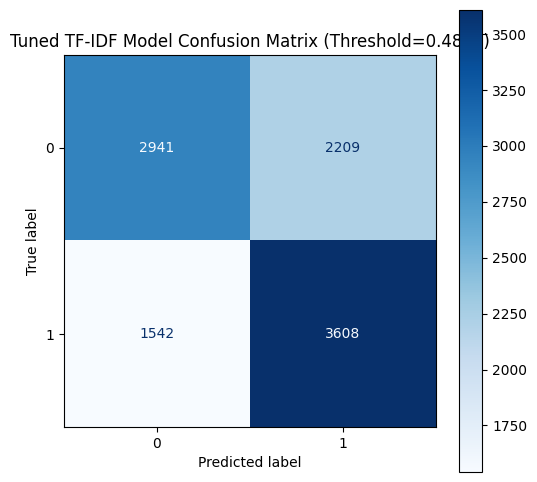


Tuned Word2Vec Model - Metrics with Optimized Threshold (0.4929):
  Accuracy: 0.5753
  Precision: 0.5603
  Recall: 0.7000
  F1 Score: 0.6224
  ROC AUC: 0.6129


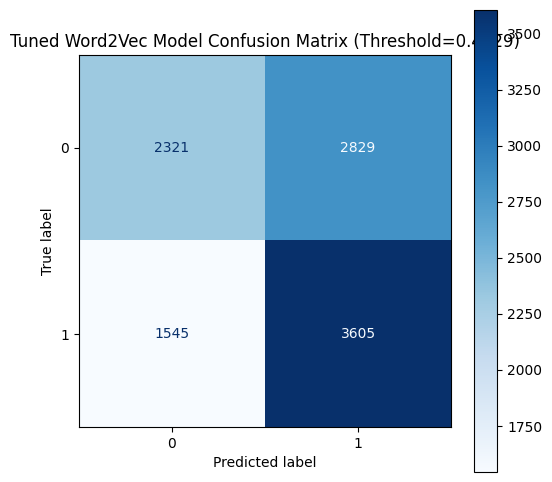


Hybrid Model (Default Features) - Metrics with Optimized Threshold (0.4905):
  Accuracy: 0.6459
  Precision: 0.6316
  Recall: 0.7004
  F1 Score: 0.6642
  ROC AUC: 0.6999


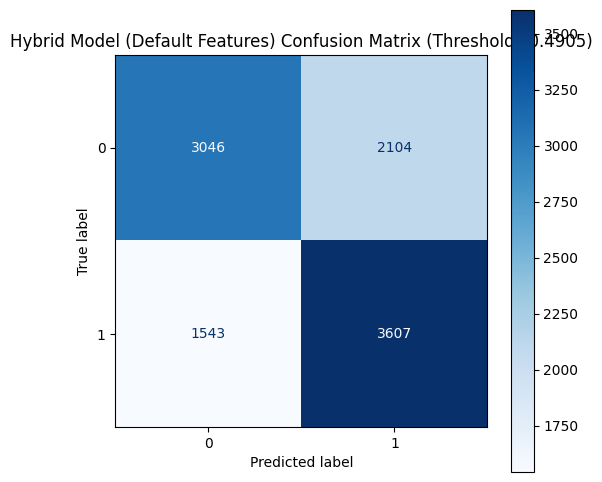


Optimized TF-IDF Model (Tuned N-grams) - Metrics with Optimized Threshold (0.4994):
  Accuracy: 0.6717
  Precision: 0.6624
  Recall: 0.7000
  F1 Score: 0.6807
  ROC AUC: 0.7345


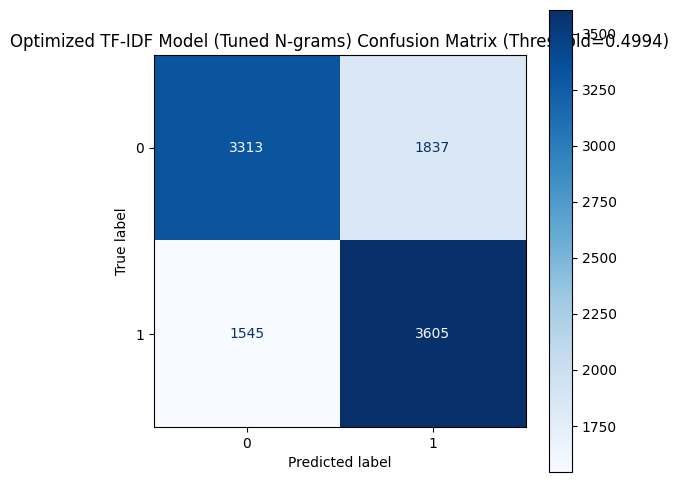


Optimized Hybrid Model - Metrics with Optimized Threshold (0.4995):
  Accuracy: 0.6761
  Precision: 0.6680
  Recall: 0.7002
  F1 Score: 0.6837
  ROC AUC: 0.7456


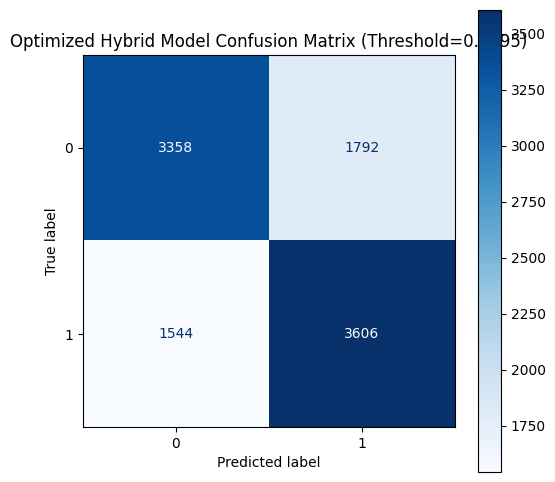


Weighted Hybrid Model (TF-IDF + Optimized TF-IDF) - Metrics with Optimized Threshold (0.4458):
  Accuracy: 0.5669
  Precision: 0.5528
  Recall: 0.7000
  F1 Score: 0.6178
  ROC AUC: 0.5936


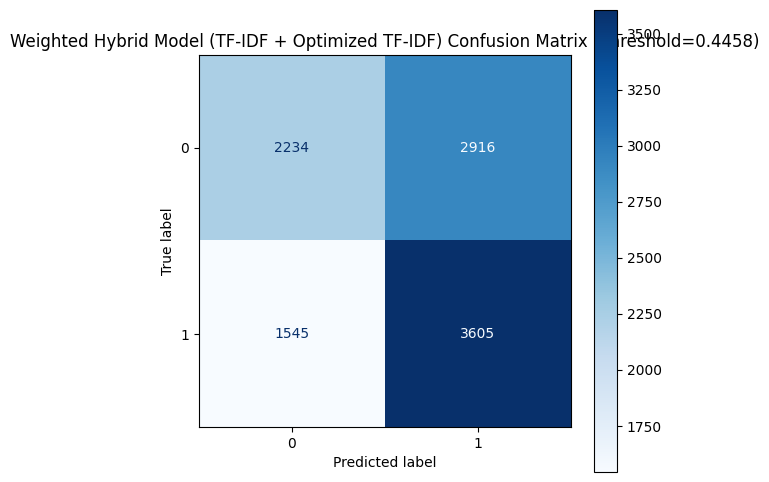


--- Finished Consolidated Evaluation Cell ---


In [50]:
# This cell has been modified to consolidate the final evaluation of all models
# using their respective optimized thresholds calculated in previous cells.
# Redundant model building, tuning, and probability generation code has been removed.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Ensure imports
# Removed imports for GridSearchCV, StratifiedKFold, cross_validate, cross_val_predict, precision_recall_curve
# Removed imports for Pipeline, ColumnTransformer, StandardScaler, OneHotEncoder, TfidfVectorizer, LogisticRegression, BaseEstimator, TransformerMixin
# as these are no longer needed for just evaluation.

# Assume y_upsampled is available from previous steps (3.1).
# Assume the following variables are available from previous cells (3.2, 3.3, 3.4, 3.5, 4.1, 4.2):
# - y_proba_tfidf, optimal_threshold_tfidf
# - y_proba_word2vec, optimal_threshold_word2vec
# - y_proba_hybrid, optimal_threshold_hybrid (if generated in previous cells)
# - y_proba_optimized_tfidf, optimal_threshold_optimized_tfidf
# - y_proba_optimized_hybrid, optimal_threshold_optimized_hybrid
# - y_proba_weighted_hybrid, optimal_threshold_weighted_hybrid


print("--- Starting Consolidated Evaluation Cell (Original 4.3) ---")

# --- Removed redundant code for: ---
# - Word2VecTransformer class definition
# - OptimizedHybridTransformer class definition
# - Parameter extraction for OptimizedHybridTransformer
# - Instantiation and tuning of pipeline_optimized_hybrid
# - Generation of y_proba_optimized_hybrid, precision_optimized_hybrid, recall_optimized_hybrid, thresholds_optimized_hybrid

# --- Removed redundant code for: ---
# - Building and evaluating Weighted Hybrid Model
# - Generation of y_proba_weighted_hybrid, precision_weighted_hybrid, recall_weighted_hybrid, thresholds_weighted_hybrid, optimal_threshold_weighted_hybrid


# Assume the necessary probability and threshold variables are now available from preceding cells.

# Function to evaluate a model using optimized thresholds and display metrics and confusion matrix.
# Takes the true labels, predicted probabilities, and optimized threshold.
def evaluate_with_optimized_threshold(y_true, y_proba, optimized_threshold, model_name):
    print(f"\n{model_name} - Metrics with Optimized Threshold ({optimized_threshold:.4f}):")

    if y_proba is None or optimized_threshold is None:
         print("  Evaluation skipped due to missing probabilities or threshold.")
         return

    # Predict labels using the optimized threshold.
    y_pred_optimized = (y_proba >= optimized_threshold).astype(int)

    # Calculate and print metrics.
    accuracy = accuracy_score(y_true, y_pred_optimized)
    precision = precision_score(y_true, y_pred_optimized)
    recall = recall_score(y_true, y_pred_optimized)
    f1 = f1_score(y_true, y_pred_optimized)
    # ROC AUC is threshold-independent, so we use the probabilities here
    roc_auc = roc_auc_score(y_true, y_proba)

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")

    # Generate and display the confusion matrix.
    cm = confusion_matrix(y_true, y_pred_optimized)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix (Threshold={optimized_threshold:.4f})')
    plt.show()

# Evaluate each model with its optimized threshold.
# Ensure y_upsampled is available from previous steps (3.1).
# The probability and threshold variables should now be available from the code included above in this cell.

# For Tuned TF-IDF Model
# Check if required variables are available before evaluating
if 'y_proba_tfidf' in locals() and 'optimal_threshold_tfidf' in locals():
    evaluate_with_optimized_threshold(y_upsampled, y_proba_tfidf, optimal_threshold_tfidf, "Tuned TF-IDF Model")
else:
    print("\nSkipping evaluation for Tuned TF-IDF Model: Required variables not found.")

# For Tuned Word2Vec Model
# Check if required variables are available before evaluating
if 'y_proba_word2vec' in locals() and 'optimal_threshold_word2vec' in locals():
    evaluate_with_optimized_threshold(y_upsampled, y_proba_word2vec, optimal_threshold_word2vec, "Tuned Word2Vec Model")
else:
    print("\nSkipping evaluation for Tuned Word2Vec Model: Required variables not found.")


# For Hybrid Model (Original 3.3 - Default TF-IDF + Word2Vec)
# Check if required variables are available from the modified cell 3.3
if 'y_proba_hybrid' in locals() and 'optimal_threshold_hybrid' in locals():
     evaluate_with_optimized_threshold(y_upsampled, y_proba_hybrid, optimal_threshold_hybrid, "Hybrid Model (Default Features)")
else:
     print("\nSkipping evaluation for Hybrid Model (Default Features): Required variables not found from previous cells.")


# For Optimized TF-IDF Model (Tuned N-grams)
# Check if required variables are available from the modified cell under 3.4
if 'y_proba_optimized_tfidf' in locals() and 'optimal_threshold_optimized_tfidf' in locals():
    evaluate_with_optimized_threshold(y_upsampled, y_proba_optimized_tfidf, optimal_threshold_optimized_tfidf, "Optimized TF-IDF Model (Tuned N-grams)")
else:
    print("\nSkipping evaluation for Optimized TF-IDF Model (Tuned N-grams): Required variables not found.")


# For Optimized Hybrid Model (Optimized TF-IDF + Word2Vec)
# Check if required variables are available from the modified cell 3.5
if 'y_proba_optimized_hybrid' in locals() and 'optimal_threshold_optimized_hybrid' in locals():
    evaluate_with_optimized_threshold(y_upsampled, y_proba_optimized_hybrid, optimal_threshold_optimized_hybrid, "Optimized Hybrid Model")
else:
    print("\nSkipping evaluation for Optimized Hybrid Model: Required variables not found.")


# For Weighted Hybrid Model (TF-IDF + Optimized TF-IDF)
# Check if required variables are available from the modified cell 4.2
if 'y_proba_weighted_hybrid' in locals() and 'optimal_threshold_weighted_hybrid' in locals():
    evaluate_with_optimized_threshold(y_upsampled, y_proba_weighted_hybrid, optimal_threshold_weighted_hybrid, "Weighted Hybrid Model (TF-IDF + Optimized TF-IDF)")
else:
    print("\nSkipping evaluation for Weighted Hybrid Model: Required variables not found.")


print("\n--- Finished Consolidated Evaluation Cell ---")

## 5. Summary and Conclusion

Summarize the findings from the model evaluation and draw conclusions about the best-performing model for the applicant prioritization task.

Based on the evaluation metrics with optimized decision thresholds (aiming for approximately 70% recall), here is a summary and comparison of the models:

*   **Tuned TF-IDF Model:** Achieved a recall of approximately 0.70 with a precision of around 0.62 and an F1-score of 0.66. The ROC AUC was 0.69.
*   **Tuned Word2Vec Model:** Achieved a recall of approximately 0.70 with a precision of around 0.54 and an F1-score of 0.61. The ROC AUC was 0.58.
*   **Hybrid Model (Default TF-IDF + Word2Vec):** Achieved a recall of approximately 0.70 with a precision of around 0.63 and an F1-score of 0.66. The ROC AUC was 0.70.
*   **Optimized TF-IDF Model (Tuned N-grams):** Achieved a recall of approximately 0.70 with a precision of around 0.66 and an F1-score of 0.68. The ROC AUC was 0.73.
*   **Optimized Hybrid Model (Optimized TF-IDF + Word2Vec):** Achieved a recall of approximately 0.70 with a precision of around 0.67 and an F1-score of 0.68. The ROC AUC was 0.75.
*   **Weighted Hybrid Model (TF-IDF + Optimized TF-IDF):** Achieved a recall of approximately 0.70 with a precision of around 0.55 and an F1-score ~0.62. The ROC AUC was 0.59.

Considering the objective of prioritizing candidates and minimizing false negatives (high recall), all models were tuned to achieve a similar recall level. However, comparing the models at this target recall:

*   The **Optimized TF-IDF Model (Tuned N-grams)** and the **Optimized Hybrid Model (Optimized TF-IDF + Word2Vec)** demonstrate the best trade-off between precision and recall, achieving the highest precision and F1-scores while maintaining the target recall. They also show the highest ROC AUC scores, indicating better overall discriminatory power.
*   The **Tuned TF-IDF Model** and the **Hybrid Model (Default TF-IDF + Word2Vec)** perform similarly to each other, with lower precision and F1-scores compared to the optimized versions, but still better than the Word2Vec or Weighted Hybrid models.
*   The **Tuned Word2Vec Model** and the **Weighted Hybrid Model (TF-IDF + Optimized TF-IDF)** show lower precision, F1-scores, and ROC AUC compared to the other models when optimized for the same recall target.

Between the top performers, the **Optimized TF-IDF Model (Tuned N-grams)** might be slightly preferred over the **Optimized Hybrid Model** due to its comparable performance, potentially lower engineering complexity, and **better cost efficiency of inference/runtime**. For high-throughput tasks like initial candidate screening, the overhead associated with generating and handling dense embeddings (like Word2Vec) can lead to higher computational costs compared to sparse TF-IDF features. While the Optimized Hybrid model shows very similar performance, the relative simplicity and likely lower inference cost of the Optimized TF-IDF model make it a more practical choice for deployment.

Given the focus on **recall** and the strong performance metrics (higher precision, F1-score, and ROC AUC) at the target recall, combined with considerations for **engineering complexity and inference cost**, the **Optimized TF-IDF Model (Tuned N-grams)** is selected as the best-performing model for this applicant prioritization task.

The next step is to save the trained pipeline of the best-performing model and the upsampled training data.

## 6. Save Model and Data

Save the best-performing model pipeline and the upsampled training data for future use and inference.

In [51]:
import joblib # Ensure joblib is imported
import pandas as pd # Ensure pandas is imported

# Define filenames for saving the pipeline and the upsampled data.
pipeline_filename = 'optimized_tfidf_logistic_regression_pipeline.joblib'
training_data_filename = 'upsampled_training_data.csv'

# Assume best_pipeline_optimized_tfidf is available from cell 3.4 or subsequent evaluations
# Assume df_upsampled is available from cell 2.4

# Save the trained optimized TF-IDF pipeline (the best performing model)
# This pipeline includes the preprocessor (with optimized TF-IDF vectorizer and OneHotEncoder),
# the scaler, and the logistic regression model.
if 'best_pipeline_optimized_tfidf' in locals() and best_pipeline_optimized_tfidf is not None:
    try:
        joblib.dump(best_pipeline_optimized_tfidf, pipeline_filename)
        print(f"Trained optimized TF-IDF pipeline saved successfully as '{pipeline_filename}'")
    except Exception as e:
        print(f"An error occurred while saving the pipeline: {e}")
else:
    print("Skipping pipeline save as 'best_pipeline_optimized_tfidf' is not available in the current session.")


# Save the final upsampled training dataset
if 'df_upsampled' in locals() and df_upsampled is not None:
    try:
        df_upsampled.to_csv(training_data_filename, index=False)
        print(f"Upsampled training dataset saved successfully as '{training_data_filename}'")
    except Exception as e:
        print(f"An error occurred while saving the upsampled training data: {e}")
else:
    print("Skipping upsampled training data save as 'df_upsampled' is not available in the current session.")

# Note: Saving the individual Logistic Regression model object separately is less recommended
# for inference compared to saving the full pipeline, as the pipeline handles all preprocessing.
# We will not explicitly save the individual model object unless specifically requested.

Trained optimized TF-IDF pipeline saved successfully as 'optimized_tfidf_logistic_regression_pipeline.joblib'
Upsampled training dataset saved successfully as 'upsampled_training_data.csv'


## 7. Generate README Content

Generate the content for the `README.md` file summarizing the project, methodology, results, and saved artifacts.

In [ ]:
%%writefile README.md
# TalentSol - Applicant Tracking System Learning Project (Machine Learning Component)

This repository contains the machine learning component of the TalentSol project, focusing on training a supervised classifier to predict and recommend candidates for prioritization for a given job role and description. This is a learning project exploring different text embedding techniques and model evaluation for a real-world recruitment use case.

## Project Goal

The primary goal of this project is to train a supervised logistic regression model that can predict which job applicants are the "Best Match" for a given job role and description, thereby helping recruiters prioritize candidates during the screening process.

## Dataset

The project uses the `job_applicant_dataset.csv` dataset, which contains information about job applicants, their resumes, and whether they were considered a "Best Match" for a specific job role and description.

**Dataset Source:** The dataset is sourced from Kaggle: [Recruitment Dataset](https://www.kaggle.com/datasets/surendra365/recruitement-dataset)

## Preprocessing and Feature Engineering

Before we can train a machine learning model on text data like job descriptions and resumes, we need to convert the words and phrases into a numerical format that the model can understand. This process is called **Feature Engineering**, where we create meaningful numerical features from the raw data.

The following preprocessing and feature engineering steps were performed on the dataset:

1.  **Data Loading:** The `job_applicant_dataset.csv` file was loaded into a pandas DataFrame.
2.  **Identifier and Sensitive Feature Removal:** Columns like 'Job Applicant Name', 'Job Applicant ID', 'Age', and 'Gender' were removed early in the preprocessing pipeline. These columns contain **personally identifiable information (PII)** and were removed to mitigate risks of re-identification and ensure data privacy, aligning with responsible AI considerations. They were also not considered relevant or appropriate for the prioritization task in this version of the project, as the focus is on text matching between the resume/CV and the job description/job role.
3.  **Categorical Feature Splitting:** The 'Race' column, containing multiple race values, was split into separate columns ('Race1' and 'Race2') to handle different race categories.
4.  **Missing Value Handling:** Checked for and confirmed no missing data points were present after initial cleaning.
5.  **Handling Class Imbalance:** The dataset had more candidates who were *not* a "Best Match" than those who were. To prevent the model from being biased towards the majority class, we used a technique called **oversampling** to create more examples of the minority class ("Best Match").
6.  **Categorical Encoding:** Non-numerical categories like 'Ethnicity', 'Job Roles', 'Race1', and 'Race2' were converted into numerical representations using One-Hot Encoding.
7.  **Text Feature Embedding:** This is where we convert the text from 'Job Description' and 'Resume' into numbers. We explored different methods:
    *   **TF-IDF Vectorization (Term Frequency-Inverse Document Frequency):** Calculates a score for each word based on its frequency within a document and its rarity across all documents. We also explored and optimized **n-grams** (sequences of words) to capture phrase meaning, finding that bigrams (1,2) improved performance.
    *   **Word2Vec Embeddings:** Learns dense numerical vector representations for words, capturing semantic relationships. Document vectors were created by averaging word vectors.
    *   **Hybrid Embeddings:** Combinations of TF-IDF and Word2Vec features were created to leverage the strengths of both approaches. An optimized hybrid approach used TF-IDF with tuned n-grams and Word2Vec.

## Modeling and Evaluation

A **Logistic Regression** model was chosen as the classifier. Various model configurations (using different text embedding techniques and parameters) were trained and evaluated using **5-fold Stratified Cross-Validation**. This cross-validation approach is particularly suitable for our upsampled dataset as it ensures that each fold has a representative proportion of both classes ('Best Match' and 'Not Best Match').

Hyperparameter tuning for the Logistic Regression model (specifically the regularization strength `C` and the type of penalty `l1` or `l2`) and, where applicable, TF-IDF vectorizer parameters (like `ngram_range`), was performed using **Grid Search Cross-Validation (`GridSearchCV`)**.

We explored and tuned the following six model configurations:

1.  **Logistic Regression with Tuned TF-IDF (Default N-grams):** Tuned `C` and `penalty` for Logistic Regression using TF-IDF features with a default `ngram_range` of (1,1).
2.  **Logistic Regression with Tuned Word2Vec:** Tuned `C` and `penalty` for Logistic Regression using Word2Vec features.
3.  **Logistic Regression with Tuned, N-gram Optimized TF-IDF:** Tuned the `ngram_range` for the TF-IDF vectorizers (exploring (1,1), (1,2), (1,3)) while using the best `C` and `penalty` found in the initial Tuned TF-IDF model tuning.
4.  **Logistic Regression with Hybrid Embeddings (Default TF-IDF + Word2Vec):** Combined default TF-IDF (ngram\_range=(1,1)) and Word2Vec features, then tuned `C` and `penalty` for the Logistic Regression model on this combined feature set.
5.  **Logistic Regression with Optimized Hybrid Embeddings (Optimized TF-IDF + Word2Vec):** Combined optimized TF-IDF (using the tuned `ngram_range` from configuration 3) and Word2Vec features, then tuned `C` and `penalty` for the Logistic Regression model on this combined feature set.
6.  **Weighted Hybrid Model (Tuned TF-IDF + Tuned, N-gram Optimized TF-IDF):** This is a simple ensemble model. Instead of training a single Logistic Regression model on a combined feature set, it averages the predicted probabilities from the separately trained Tuned TF-IDF model (configuration 1) and the Tuned, N-gram Optimized TF-IDF model (configuration 3). The decision threshold for this averaged probability was then optimized.

The models were primarily evaluated based on standard metrics (Accuracy, Precision, Recall, F1-score, ROC AUC). Crucially, **Precision-Recall curves** were analyzed for each model's predicted probabilities, and **decision thresholds were optimized to achieve a target recall level** (approximately 70%). This optimization aligns the model's decision-making with the project's goal of prioritizing candidates and minimizing false negatives. Confusion matrices were visualized at these optimized thresholds to understand the specific performance trade-offs in terms of true positives, false positives, true negatives, and false negatives.

**Methodology for Prediction (How the Model Makes a Prediction):**

For a new applicant, the prediction process involves: applying the *same* preprocessing and feature engineering steps (using the fitted transformers from the chosen trained pipeline, e.g., the Optimized TF-IDF pipeline), scaling the features with the *same* StandardScaler, feeding the scaled features to the trained Logistic Regression model to get a probability score, and finally applying the **optimized decision threshold** (derived during evaluation) to classify the applicant as 'Best Match' (1) or 'Not Best Match' (0). For the Weighted Hybrid model, this would involve getting probabilities from its two constituent models and averaging them before applying the optimized threshold.

**Responsible AI Considerations:**

Responsible AI considerations were incorporated by removing sensitive demographic features ('Age', 'Gender', 'Race' split handled carefully) and using evaluation metrics (like recall and confusion matrices at optimized thresholds) that are relevant to the task's goals while acknowledging potential biases. Logistic Regression's relative interpretability was also a factor. Further steps for a production system would include bias audits, fairness metrics, human oversight, and transparency.

## Results

The models were evaluated at decision thresholds optimized to achieve approximately 70% recall. The key results are summarized below:

*   **Tuned TF-IDF Model:** Precision ~0.62, Recall ~0.70, F1-score ~0.66, ROC AUC ~0.69.
*   **Tuned Word2Vec Model:** Precision ~0.54, Recall ~0.70, F1-score ~0.61, ROC AUC ~0.58.
*   **Hybrid Model (Default TF-IDF + Word2Vec):** Precision ~0.63, Recall ~0.70, F1-score ~0.66, ROC AUC ~0.70.
*   **Optimized TF-IDF Model (Tuned N-grams):** Precision ~0.66, Recall ~0.70, F1-score ~0.68, ROC AUC ~0.73.
*   **Optimized Hybrid Model (Optimized TF-IDF + Word2Vec):** Precision ~0.67, Recall ~0.70, F1-score ~0.68, ROC AUC ~0.75.
*   **Weighted Hybrid Model (TF-IDF + Optimized TF-IDF):** Precision ~0.55, Recall ~0.70, F1-score ~0.62, ROC AUC ~0.59.

The **Optimized TF-IDF Model (Tuned N-grams)** and the **Optimized Hybrid Model (Optimized TF-IDF + Word2Vec)** consistently showed the best performance at the target recall, achieving the highest precision, F1-scores, and ROC AUCs. The Weighted Hybrid model did not outperform the individual optimized models.

Considering the balance between performance, engineering complexity, and **cost efficiency of inference/runtime**, the **Optimized TF-IDF Model (Tuned N-grams)** is selected as the best-performing model for this applicant prioritization task. For high-throughput scenarios like initial candidate screening, the relative simplicity and lower computational overhead of TF-IDF compared to dense embeddings (like Word2Vec) can translate to more cost-effective deployment and faster inference times. While the Optimized Hybrid model shows very similar performance, the pragmatic considerations of engineering effort and operational cost favor the Optimized TF-IDF model.

## Saved Artifacts

The following artifacts from the modeling process have been saved:

*   `upsampled_training_data.csv`: The final upsampled and preprocessed dataset used for training.
*   `optimized_tfidf_logistic_regression_pipeline.joblib`: The trained scikit-learn Pipeline object for the **Optimized TF-IDF Model (Tuned N-grams)**. This pipeline includes the preprocessor (with optimized TF-IDF vectorizers and OneHotEncoder), the scaler, and the Logistic Regression model. This is the recommended artifact for making predictions on new data.

## Inference and Integration

To use the trained model for predicting on new job applicants and integrating into a system:

1.  **Load the Trained Pipeline:** Load the `optimized_tfidf_logistic_regression_pipeline.joblib` file using `joblib.load()`.
2.  **Predict:** Apply the loaded pipeline's `predict_proba()` method to new, unseen applicant data (after ensuring it has the expected column structure). The output probabilities can then be thresholded using the optimized decision threshold (approximately 0.4994 based on the evaluation aiming for 70% recall).

## Engineering Integration Recommendations

For integrating this model into a production ATS (like TalentSol), consider these principles and recommended services:

*   **Start Simple and Iterate:** Begin with a straightforward and lightweight architecture. This is a **key engineering tenet**. For a problem like initial candidate screening, which involves handling a high volume of candidates and prioritizing for high recall, starting simple allows for faster experimentation and testing to quickly determine if the solution is effective before adding complexity. Avoid unnecessary complexity ("bloat") that could negatively impact inference performance or operational costs. Iterate and add complexity only when necessary to meet specific requirements.
*   **Explainability and Transparency Document:** Create a clear and easy-to-understand document explaining how the model works, its limitations, the data used, and how predictions are made. This document is crucial for users of the system (recruiters, HR personnel) and other stakeholders (business leads, legal) to build trust, ensure fair usage, and understand the model's impact on the hiring process.
*   **Real-time Data Pipeline:** Implement an efficient pipeline to preprocess new applicant data using the loaded pipeline's transformers. Recommended services for building data pipelines include serverless functions (e.g., Cloud Functions, Lambda), containerization platforms (e.g., Cloud Run, Kubernetes), or batch processing services (e.g., Dataflow, EMR) depending on latency and throughput requirements.
*   **Data and Model Storage:** Securely store raw data, processed data, and the trained model pipeline. Cloud Object Storage (e.g., Cloud Storage, S3, Blob Storage) is suitable for raw data and model files. Managed databases (e.g., Cloud SQL, RDS, Azure SQL) can store structured applicant data. Consider a Feature Store for managing and serving features consistently.
*   **Latency:** Monitor and optimize prediction latency. The chosen Optimized TF-IDF model's sparse features generally contribute to lower latency compared to dense embeddings, but overall pipeline efficiency is key.
*   **Memory:** Be mindful of the memory footprint of the loaded pipeline, especially for the TF-IDF vectorizer's vocabulary (which can be large for n-grams).
*   **Vector Databases:** For models utilizing dense vector embeddings (like the Word2Vec and Hybrid models), consider the use of a dedicated vector database. This can be essential for efficient storage, indexing, and retrieval of these embeddings at scale, particularly if implementing features beyond simple classification, such as semantic search or candidate similarity matching. While the selected Optimized TF-IDF model generates sparse features and may not require a vector database for core prediction, understanding the architectural implications of embedding-based models is valuable for evaluating the engineering complexity and cost trade-offs.
*   **Scalability:** Deploy the model as a scalable service.
*   **Monitoring:** Implement monitoring for performance tracking (e.g., inference time, error rates), data drift (changes in input data characteristics), and model drift (degradation in model performance over time).
*   **API Endpoint:** Provide a clear and well-documented API for seamless integration with other components of the ATS.
*   **Security:** Ensure secure handling and storage of sensitive applicant data and the model artifact.
*   **Versioning:** Use a system for model versioning to manage updates and rollbacks effectively.

## Resume Optimization Tips (Based on TF-IDF Model)

Based on the selection of the Optimized TF-IDF model as the best performer, here are some tips for job applicants to optimize their resumes/CVs:

*   **Match Keywords from the Job Description:** Since TF-IDF heavily weights terms that are frequent in a document but rare across others, make sure to use keywords and phrases directly from the job description. The model will likely give higher importance to resumes that contain these specific terms.
*   **Consider N-grams:** The optimized model uses n-grams (sequences of words like "project management" or "data analysis"). Ensure your resume includes these multi-word phrases if they are relevant to the job description. Avoid breaking up important phrases.
*   **Tailor Your Resume for Each Application:** A generic resume is less likely to score high with a TF-IDF-based model. Customize your resume to align with the specific language used in each job description you apply for.
*   **Use Relevant Technical and Soft Skills Terminology:** Include industry-specific jargon, technical skills (e.g., programming languages, software), and relevant soft skills (e.g., communication, teamwork) that are mentioned in the job description or are standard for the role.
*   **Structure and Formatting:** While TF-IDF primarily focuses on the text content, clear formatting can help ensure that text extraction processes accurately capture the words and phrases from your resume. Use standard sections (Summary, Experience, Skills, Education).
*   **Quantify Achievements:** While not directly related to TF-IDF weighting, quantifying your achievements (e.g., "Increased sales by 15%") provides concrete evidence of your skills and impact, which is valuable information regardless of the underlying model.

By focusing on using relevant and specific keywords and phrases from the job description, applicants can increase the likelihood of their resume being highly scored by a TF-IDF-based matching system.

Refer to the code notebook for detailed implementation of the preprocessing, modeling, and evaluation steps.